In [1]:
# ---------------- plotting geochemical data


# --- import modules

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# --- create dataframe from excel spreadsheet using pandas import command 

# df_data = pd.read_csv('C:/Users/u0125722/OneDrive - KU Leuven/Buranga/EPMA/Buranga_EDS_apfu.csv', 
#                           encoding = "ANSI")


df_data = pd.read_csv('C:/Users/u0125722/OneDrive - KU Leuven/Buranga/_Article3-MH_transition/_git/Data/Buranga_FI_combined_datasets_mol.csv', 
                          encoding = "ANSI", index_col=0)



# df_data = pd.read_csv('C:/Users/u0125722/OneDrive - KU Leuven/Buranga/_Article3-MH_transition/_git/Data/4-LAICPMS/Buranga_host_LAICPMS_apfu.csv',
#                           encoding = "ANSI")
                      



In [3]:
colors_map = {'augelite' : 'rgb(51,255,51)',
          'bertossaite' : 'rgb(204,121,167)',
          'brazilianite' : 'rgb(250,120,10)',
          'quartz' : 'rgb(240,228,66)',
          'scorzalite' : 'rgb(0,0,255)',
          'trolleite' : 'rgb(0,158,115)',
          'wyllieite' : 'rgb(0,170,250)',
             'rosemaryite' : 'rgb(250,10,10)',
             'montebrasite' : 'rgb(255,150,150)',
             'variscite' : 'rgb(255,150,150)',
             'strengite' : 'rgb(255,150,150)',
             'wardite' : 'rgb(255,150,150)',
             'apatite' : 'rgb(255,150,150)',}

Host_list = ["wyllieite", "trolleite", "bertossaite",'scorzalite',
             'augelite','brazilianite']

In [4]:
df_data.loc[:,'h_alk'] = df_data.loc[:,['K','Rb','Cs']].sum(axis=1, min_count=1)

df_data.loc[:,'LiNa'] = df_data.loc[:,['Li','Na']].sum(axis=1, min_count=1)

df_data.loc[:,'mafic'] = df_data.loc[:,['Ca','Mn','Fe','Mg']].sum(axis=1, min_count=1)

df_data['Li/Cs'] = df_data['Li']/df_data['Cs']


df_data['CF'] = df_data['h_alk']-df_data['LiNa']-df_data['mafic']



df_NaN = df_data.fillna(0)

df_NaN['Cl'] = df_NaN['Li']+df_NaN['Na']+df_NaN['K']+df_NaN['Rb']+df_NaN['Cs']+(2*(df_NaN['Mg']+df_NaN['Mn']+df_NaN['Sr']+df_NaN['Ba']+df_NaN['Ca']+df_NaN['Fe']+df_NaN['Sn']))

df_data['Cl'] = df_NaN['Cl'].replace(0.000,np.nan)

df_data['K/Cl'] = df_data['K']/df_data['Cl']
df_data['Na/Cl'] = df_data['Na']/df_data['Cl']
df_data['K/Cl'] = df_data['K']/df_data['Cl']
df_data['Li/Cl'] = df_data['Li']/df_data['Cl']
df_data['Cs/Cl'] = df_data['Cs']/df_data['Cl']
df_data['Rb/Cl'] = df_data['Rb']/df_data['Cl']
df_data['Fe/Cl'] = df_data['Fe']/df_data['Cl']
df_data['Mn/Cl'] = df_data['Mn']/df_data['Cl']
df_data['Ca/Cl'] = df_data['Ca']/df_data['Cl']

df_data['Mn/Fe'] = df_data['Mn']/df_data['Fe']

df_data['Na/alk'] = df_data['Na']/df_data['Alkalis']
df_data['K/alk'] = df_data['K']/df_data['Alkalis']
df_data['Li/alk'] = df_data['Li']/df_data['Alkalis']
df_data['Rb/alk'] = df_data['Rb']/df_data['Alkalis']
df_data['Cs/alk'] = df_data['Cs']/df_data['Alkalis']

print(df_data.columns)

df_data


Index(['sample', 'piece', 'field', 'analysis', 'Host', 'Length', 'Width',
       'Phases', 'VL (%)', 'VV (%)',
       ...
       'Rb/Cl', 'Fe/Cl', 'Mn/Cl', 'Ca/Cl', 'Mn/Fe', 'Na/alk', 'K/alk',
       'Li/alk', 'Rb/alk', 'Cs/alk'],
      dtype='object', length=101)


sample piece field analysis       Host  Length  Width     Phases  \
0       BU18FA22     A   ff1     fi01     quartz     9.1    7.4      L - V   
1       BU18FA22     A   ff1     fi02     quartz     9.8    7.8      L - V   
2       BU18FA22     A   ff2     fi01     quartz    24.8   13.3      L - V   
3       BU18FA22     A   ff2     fi02     quartz    13.8    8.9      L - V   
4       BU18FA22     A   ff2     fi03     quartz    14.1   10.2      L - V   
..           ...   ...   ...      ...        ...     ...    ...        ...   
269  BU18FA19(2)     A   ff1    fi010   augelite     NaN    NaN      L - V   
270     BU18FA04     C   ff8     fi01  trolleite     NaN    NaN      L - V   
271     BU18FA04     C   ff8     fi03  trolleite     NaN    NaN      L - V   
272     BU18FA04     C   ff8     fi04  trolleite     NaN    NaN  L - V - S   
273     BU18FA04     C   ff8     fi05  trolleite     NaN    NaN      L - V   

     VL (%)  VV (%)  ...     Rb/Cl     Fe/Cl     Mn/Cl  Ca/Cl     Mn/Fe  \
0      75.0    25.0  ...       NaN       NaN       NaN    NaN       NaN   
1      72.0    28.0  ...       NaN       NaN       NaN    NaN       NaN   
2      73.0    27.0  ...  0.006778  0.003586  0.002041    NaN  0.569212   
3      80.0    20.0  ...       NaN       NaN       NaN    NaN       NaN   
4      77.0    23.0  ...       NaN       NaN       NaN    NaN       NaN   
..      ...     ...  ...       ...       ...       ...    ...       ...   
269     NaN     NaN  ...  0.010357       NaN       NaN    NaN       NaN   
270     NaN     NaN  ...  0.007261  0.007799  0.004898    NaN  0.628068   
271     NaN     NaN  ...  0.010392       NaN  0.004386    NaN       NaN   
272     NaN     NaN  ...  0.010468  0.007478  0.002140    NaN  0.286170   
273     NaN     NaN  ...  0.008262       NaN  0.000502    NaN       NaN   

       Na/alk     K/alk    Li/alk    Rb/alk    Cs/alk  
0         NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN  
2    0.785447  0.189096  0.015675  0.007877  0.001905  
3    0.635279  0.364721       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN       NaN  
..        ...       ...       ...       ...       ...  
269  0.631420  0.356509       NaN  0.010357  0.001715  
270  0.487557  0.487976  0.015809  0.008115  0.000544  
271  0.375996  0.523721  0.088792  0.010493  0.000998  
272  0.435614  0.397133  0.155178  0.010823  0.001252  
273  0.923969  0.060742  0.006007  0.008290  0.000993  

[274 rows x 101 columns]

In [5]:
# --- print the colums of the imported dataframe - can be changed if necessary

host = 'Mineral'

# df_data['Mineral'] = df_data['Mineral'].fillna('')
# df_data = df_data.fillna(0)

# df_data = df_data[df_data['P'] != 0]

df_wyl = df_data.query('Host == "wyllieite"')
df_mbs = df_data.query('Host == "montebrasite"')
df_ap = df_data.query('Host == "apatite"')
df_rsm = df_data.query('Host == "rosemaryite"')
df_trl = df_data.query('Host == "trolleite"')
df_bts = df_data.query('Host == "bertossaite"')
df_scz = df_data.query('Host == "scorzalite"')
df_aug = df_data.query('Host == "augelite"')
df_brz = df_data.query('Host == "brazilianite"')
df_eos = df_data.query('Host == "eosphorite"')
df_lac = df_data.query('Host == "lacroixite"')
df_sam = df_data.query('Host == "samuelsonite"')
df_brg = df_data.query('Host == "burangaite"')
df_stg = df_data.query('Host == "strengite"')
df_stvar = df_data.query('Host == "variscite+strengite"')
df_wd = df_data.query('Host == "wardite"')
df_qz = df_data.query('Host == "quartz"')

df_mag = df_data.query('Host == ("wyllieite","trolleite")')

df_mh = df_data.query('Host == ("bertossaite","augelite","brazilianite")')

df_mag


sample piece field analysis       Host  Length  Width     Phases  \
18   BU18FA22     B   ff1     fi01  trolleite    11.3    8.2      L - V   
19   BU18FA22     B   ff1     fi02  trolleite    11.7    7.3      L - V   
20   BU18FA22     B   ff1     fi03  trolleite     9.6    7.4      L - V   
21   BU18FA22     B   ff1     fi04  trolleite    13.3    6.5      L - V   
22   BU18FA22     B   ff1     fi05  trolleite     7.8    4.8  L - V - S   
..        ...   ...   ...      ...        ...     ...    ...        ...   
268  BU18FA32   AII  incC     fi08  wyllieite     NaN    NaN  L - V - S   
270  BU18FA04     C   ff8     fi01  trolleite     NaN    NaN      L - V   
271  BU18FA04     C   ff8     fi03  trolleite     NaN    NaN      L - V   
272  BU18FA04     C   ff8     fi04  trolleite     NaN    NaN  L - V - S   
273  BU18FA04     C   ff8     fi05  trolleite     NaN    NaN      L - V   

     VL (%)  VV (%)  ...     Rb/Cl     Fe/Cl     Mn/Cl  Ca/Cl     Mn/Fe  \
18     75.0    25.0  ...       NaN       NaN       NaN    NaN       NaN   
19     69.0    31.0  ...       NaN       NaN       NaN    NaN       NaN   
20     76.0    24.0  ...       NaN       NaN       NaN    NaN       NaN   
21     80.0    20.0  ...       NaN       NaN       NaN    NaN       NaN   
22     73.0    22.0  ...       NaN       NaN       NaN    NaN       NaN   
..      ...     ...  ...       ...       ...       ...    ...       ...   
268     NaN     NaN  ...  0.000566  0.174764  0.111273    NaN  0.636703   
270     NaN     NaN  ...  0.007261  0.007799  0.004898    NaN  0.628068   
271     NaN     NaN  ...  0.010392       NaN  0.004386    NaN       NaN   
272     NaN     NaN  ...  0.010468  0.007478  0.002140    NaN  0.286170   
273     NaN     NaN  ...  0.008262       NaN  0.000502    NaN       NaN   

       Na/alk     K/alk    Li/alk    Rb/alk    Cs/alk  
18        NaN       NaN       NaN       NaN       NaN  
19        NaN       NaN       NaN       NaN       NaN  
20        NaN       NaN       NaN       NaN       NaN  
21        NaN       NaN       NaN       NaN       NaN  
22        NaN       NaN       NaN       NaN       NaN  
..        ...       ...       ...       ...       ...  
268  0.858407  0.052103  0.087820  0.001341  0.000329  
270  0.487557  0.487976  0.015809  0.008115  0.000544  
271  0.375996  0.523721  0.088792  0.010493  0.000998  
272  0.435614  0.397133  0.155178  0.010823  0.001252  
273  0.923969  0.060742  0.006007  0.008290  0.000993  

[83 rows x 101 columns]

In [6]:
# --- Calculate statistc values for the dataset

import scipy.stats as st

to_stat = df_data

var = 'N2'

    # --- Confidence interval of the desired variable
# print(st.t.interval(alpha=0.95, df=len(to_stat[var].dropna())-1, loc=np.median(to_stat[var].dropna()), scale=st.sem(to_stat[var].dropna()))) 

    # --- Main statistical values
print(to_stat[var].median(),
"\n\n",
      to_stat[var].mean(),
"\n\n",
to_stat[var].std(),
     "\n\n",
     to_stat[var].count(),
     "\n\n",
     to_stat[var].min(),
     "\n\n",
     to_stat[var].max())


# var1 = 'K'
# var2 = 'Cs'
# var3 = 'Rb'
# var4 = 'Na'
# var5 = 'Li'
# var6 = 'Alkalis'

# print('The values for wylleite are:\n',
#       var1, '=', round(df_wyl[var1].median(),3),'+/-',round(df_wyl[var1].std(),3),'\n',
#       var2, '=', round(df_wyl[var2].median(),5),'+/-',round(df_wyl[var2].std(),5),'\n',
#       var3, '=', round(df_wyl[var3].median(),5),'+/-',round(df_wyl[var3].std(),5),'\n',
#       var4, '=', round(df_wyl[var4].median(),3),'+/-',round(df_wyl[var4].std(),3),'\n',
#       var5, '=', round(df_wyl[var5].median(),5),'+/-',round(df_wyl[var5].std(),5),'\n',
#       var6, '=', round(df_wyl[var6].median(),2),'+/-',round(df_wyl[var6].std(),2),'\n',
#       "\n\n",
#       'The values for trolleite are:\n',
#       var1, '=', round(df_trl[var1].median(),3),'+/-',round(df_trl[var1].std(),3),'\n',
#       var2, '=', round(df_trl[var2].median(),5),'+/-',round(df_trl[var2].std(),5),'\n',
#       var3, '=', round(df_trl[var3].median(),5),'+/-',round(df_trl[var3].std(),5),'\n',
#       var4, '=', round(df_trl[var4].median(),3),'+/-',round(df_trl[var4].std(),3),'\n',
#       var5, '=', round(df_trl[var5].median(),5),'+/-',round(df_trl[var5].std(),5),'\n',
#       var6, '=', round(df_trl[var6].median(),2),'+/-',round(df_trl[var6].std(),2),'\n')


5.550000000000001 

 6.746499999999998 

 5.338321471272902 

 200 

 0.0 

 27.700000000000003


In [6]:
# --- group dataframe into cluster defined by host and type and sabe the mean values for it group
df_Host = df_data.groupby(by=["Host", "type"], dropna=False).median()

        # ---- save an array with the classifiers of each group 
Classifiers = df_Host.index.to_numpy()

        # ---- input the array with classifiers as columns in the grouped dataframe
host_lst = [] # creates an empty list to receive classifiers
type_lst = []

for i in range(len(Classifiers)):  # append classifiers to the empty lists using the index of original dataframe
    host_lst.append(Classifiers[i][0])
    type_lst.append(Classifiers[i][1])

df_Host['Host'] = host_lst #input lists as columns of grouped dataframe
df_Host['type'] = type_lst

# df_Host.to_csv('Buranga_FI_combined_datasets_median.csv',index=True)

df_Host['N2']

Host          type  
augelite      type1     4.00
              type2A    4.05
              type2B    4.60
              type3     2.90
bertossaite   type1     0.10
              type2A    3.40
              type2B    0.00
              type3     0.10
brazilianite  type1     4.85
              type2A    6.30
              type3     2.55
quartz        type2A    6.40
              type2B     NaN
scorzalite    type2A    3.90
trolleite     type1     9.00
              type2A    8.80
              type2B    4.70
wyllieite     type1     8.30
Name: N2, dtype: float64

# Binary plots

In [12]:
   # --- plot figures
    
df_to_plot = df_bts
x = 'Cl'
y = 'Rb/Cs'

# size = df_data['Fe'].fillna(1)


fig = px.scatter(df_to_plot, x=x, y=y,
                 symbol = 'sample', 
                 color = 'type', 
                 hover_data=["sample",'piece','field','analysis'],
#                  size = 'type',
                 width=650, height=500,
                 category_orders={"Host": ["wyllieite", 'montebrasite',
                                           "rosemaryite", "trolleite", 
                                           "bertossaite",'scorzalite',
                                          'augelite','brazilianite', 'quartz']},
                 color_discrete_map=colors_map, # replaces default color mapping by value
#                 log_x=True, log_y=True,
#                 labels={x: x + " [mol/kg]",
#                         y: y + " [mol/kg]"}
                )

fig.update_layout(template="simple_white")

fig.update_layout(showlegend=True,
#                   legend=dict(x=0.0,
#                               y=0.99,
#                               traceorder="normal")
                 )





        # --- Add extra data from the literature to the plot 
    
# fig.add_traces(list(px.scatter(x=df_aug[x], y=df_aug[y],
#                                color_discrete_map=colors_map,
#                                symbol = df_aug['type'],
#                                color=df_aug['Host']).select_traces()))

# fig.add_traces(list(px.scatter(x=df_trl[x], y=df_trl[y],
#                                color_discrete_map=colors_map,
#                                 symbol = df_trl['type'],
#                                color=df_trl['Host']).select_traces()))

# fig.add_traces(list(px.scatter(x=df_brz[x], y=df_brz[y],
#                                color_discrete_map=colors_map,
#                                 symbol = df_brz['type'],
#                                color=df_brz['Host']).select_traces()))


        # --- Add extra traces and annotations to the graph, e.g. legend for ratio lines

# fig.add_traces(list(px.line(x=[0, 0.1], y=[0, 0.15]).select_traces())) #1:1.5 ratio

# annotations = [
#     dict(xref='paper', yref='paper', x=0.7, y=0.99,
#                               text='1:50<br>ratio',
#                               font=dict(family='Arial',
#                                         size=14,
#                                         color='rgb(100,100,100)'),
#                               showarrow=False)
#               ]

# fig.update_layout(annotations=annotations)

# fig.data[-1].line.color = 'rgba(0,0,0,0.3)'

fig.data = fig.data[::-1] #reverse order of plotting


        # --- Modify graphics of the plot
    
fig.update_traces(marker=dict(size=10, 
                              line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)

fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")


# fig.update_xaxes(range=(0,5))
# fig.update_yaxes(range=(10,140))

# fig.update_xaxes(tickvals=[0.01,0.1,1,10,100,1000,10000,100000])
# fig.update_yaxes(tickvals=[0,0.25,0.5,0.75,1,1.25,1.5])


# fig.write_image('C:/Users/u0125722/OneDrive - KU Leuven/Buranga/Figures_Drawings/Thesis/plot_binary-mol_' 
#                 + 'K-Rb' + '_' + 'Cl' + '_bts.pdf');

fig.show()

In [8]:
# --- ternary plot 

df_to_plot = df_data

df_to_plot['Rb100'] = df_to_plot['Rb']*100
df_to_plot['Cs100'] = df_to_plot['Cs']*100
df_to_plot['Kox'] = df_to_plot['K%']/0.830147
df_to_plot['K100'] = df_to_plot['Kox']*100


A = 'CO2'
B = 'N2'
C = 'CH4'

fig = px.scatter_ternary(df_to_plot, a=A, b=B, c=C,
                          color="Host",
                         symbol="type",
                         category_orders={"Host": ["wyllieite", 'montebrasite',
                                           "rosemaryite", "trolleite", 
                                           "bertossaite",'scorzalite',
                                          'augelite','brazilianite', 'quartz']},
                        color_discrete_map=colors_map)
#                           ,range_color=[1,5],color_continuous_scale='Inferno',hover_data=["Mineral"]))

fig.update_traces(marker=dict(size=10, 
                              line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)

fig.update_layout(template="plotly_white")


fig.update_ternaries(aaxis_min=0.70)

# fig.write_image("C:/Users/u0125722/OneDrive - KU Leuven/Buranga/Figures_Drawings/Thesis/plot_ternary_"+A+"_"+B+"_"+C+".pdf")

fig.show()

# Boxplots

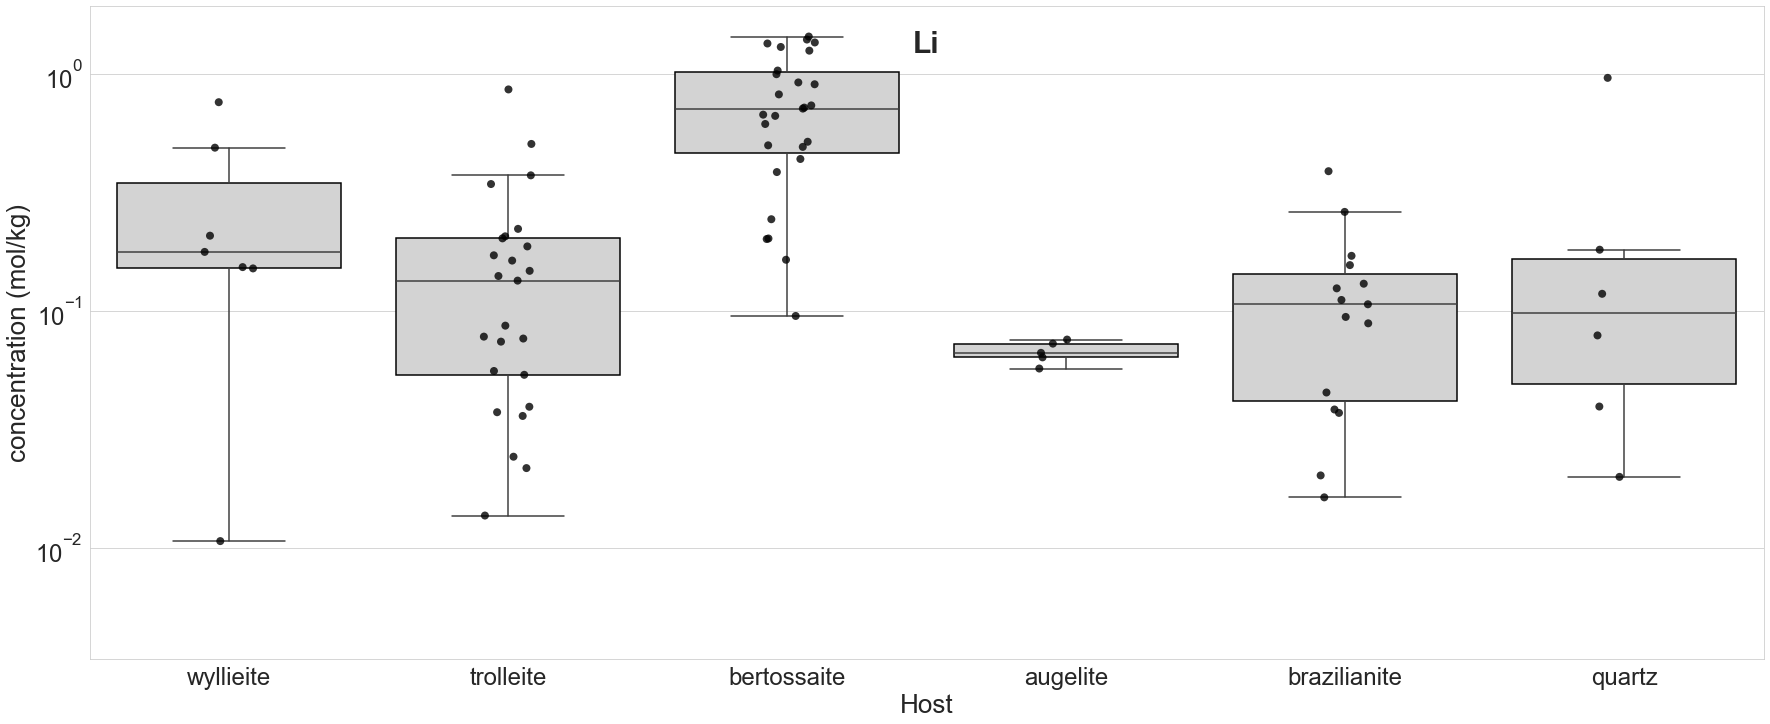

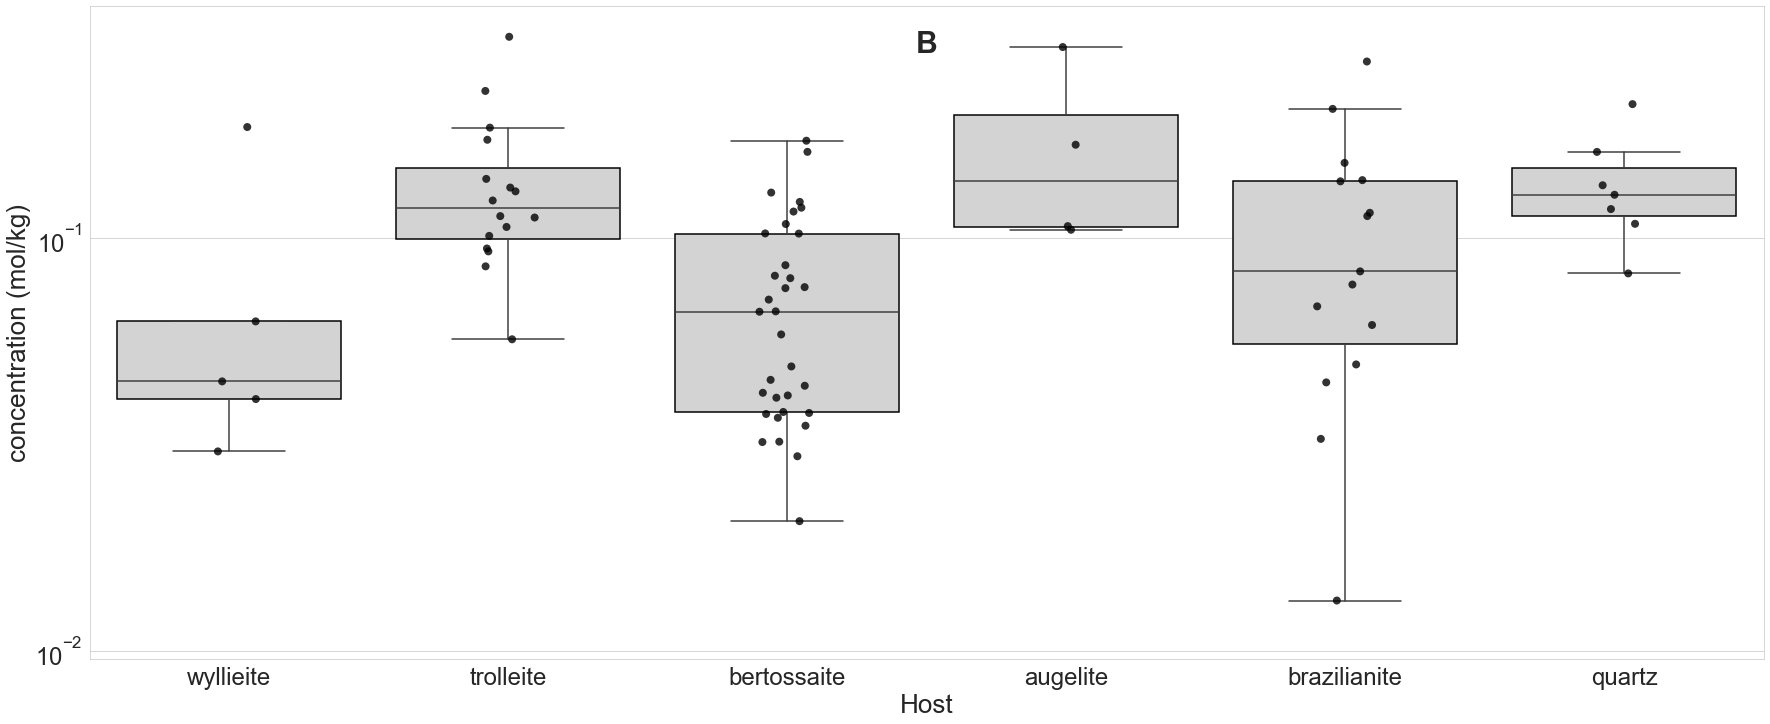

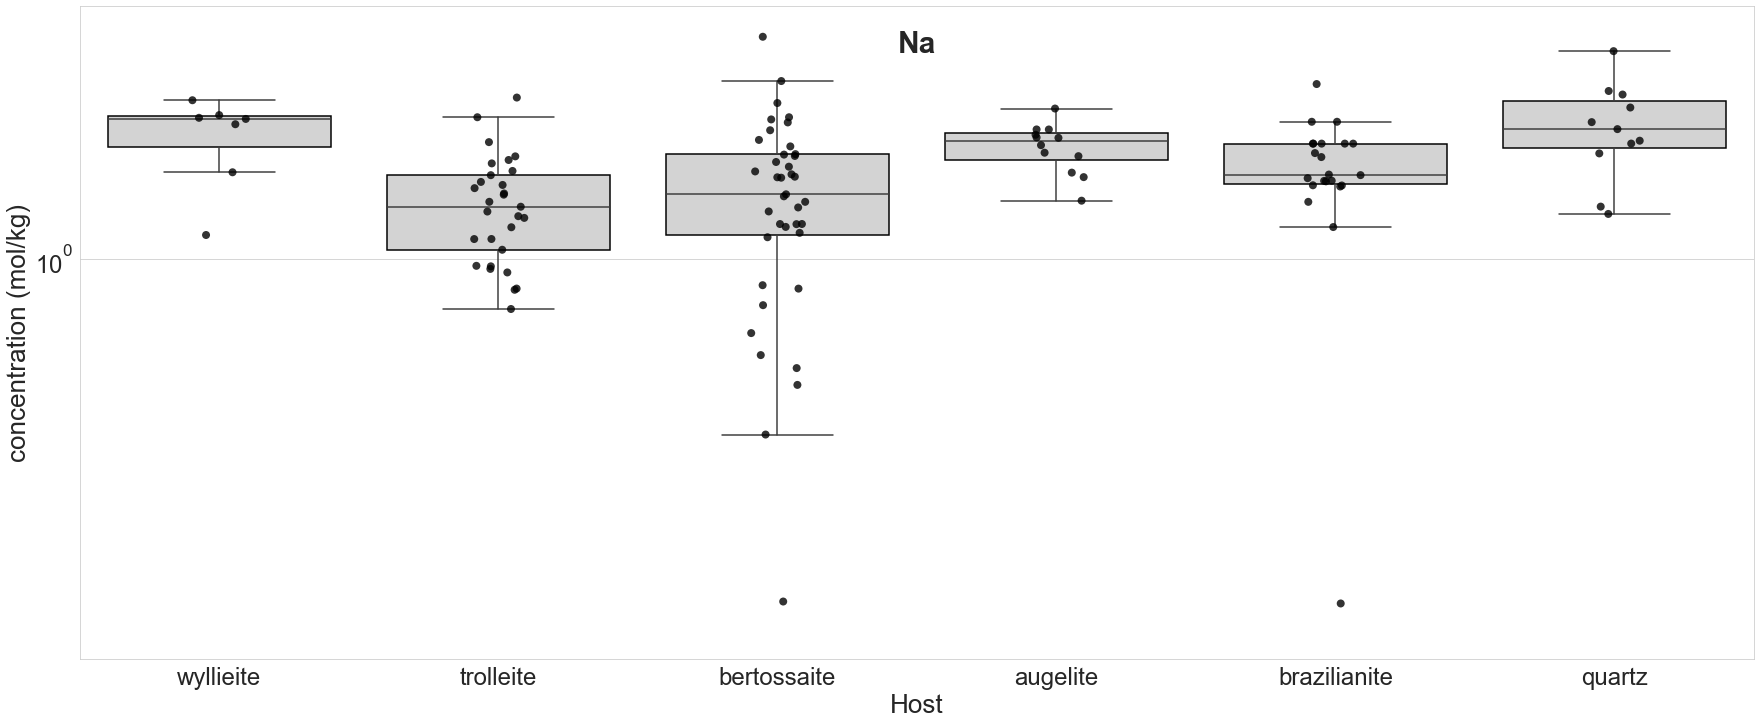

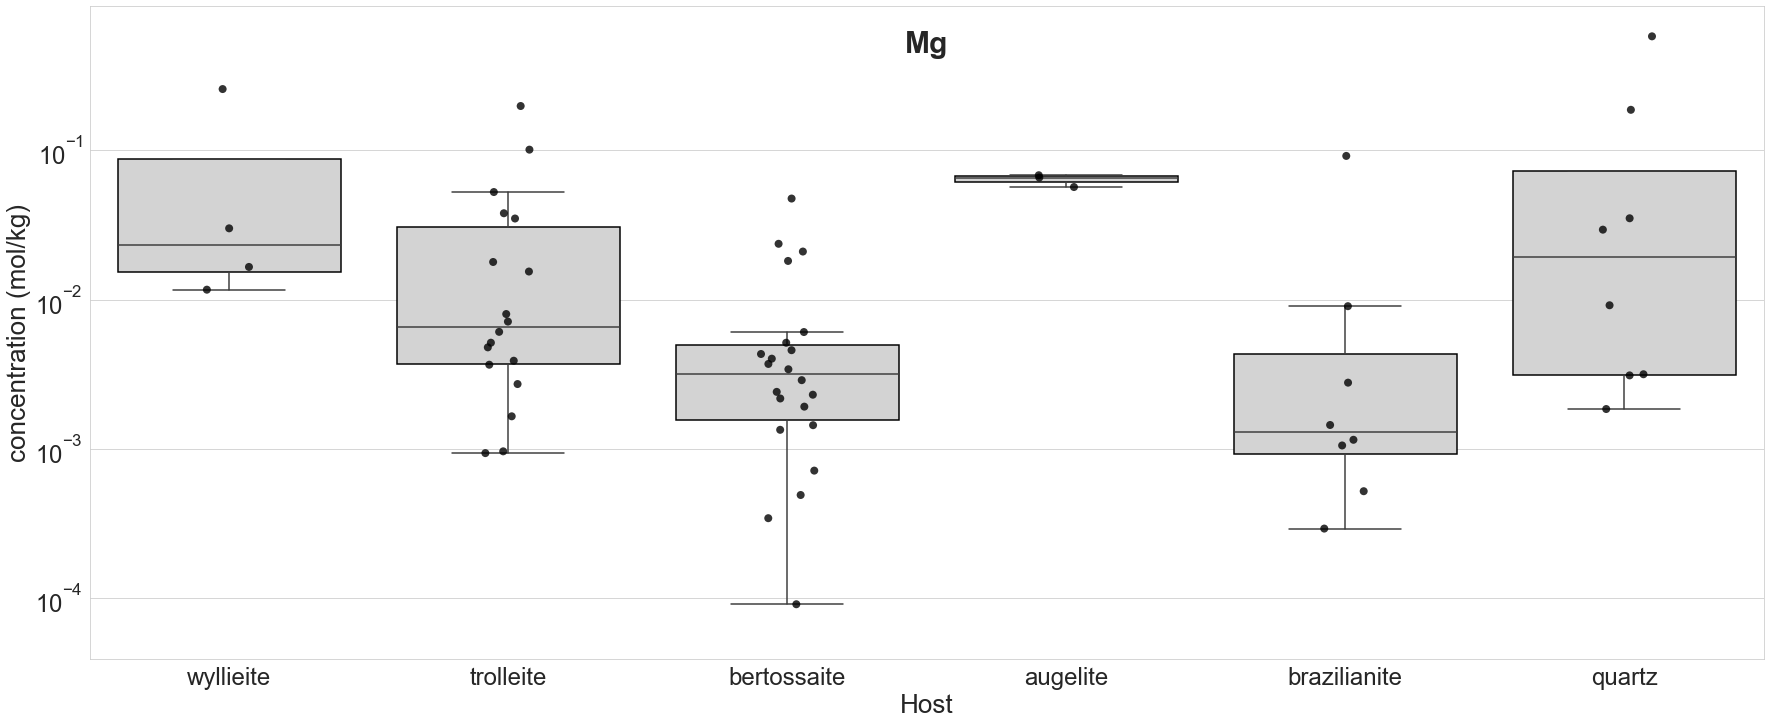

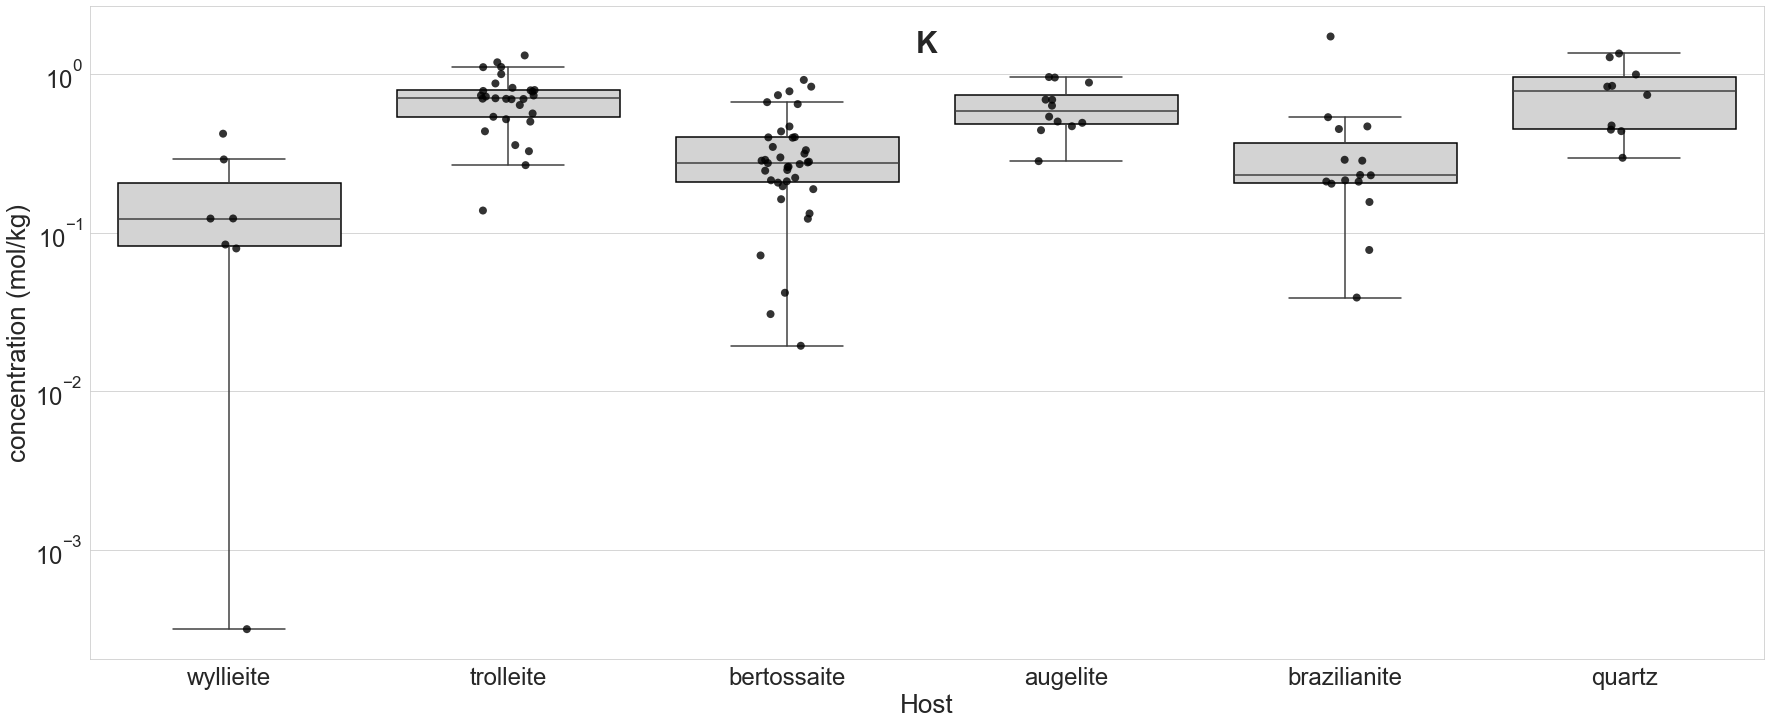

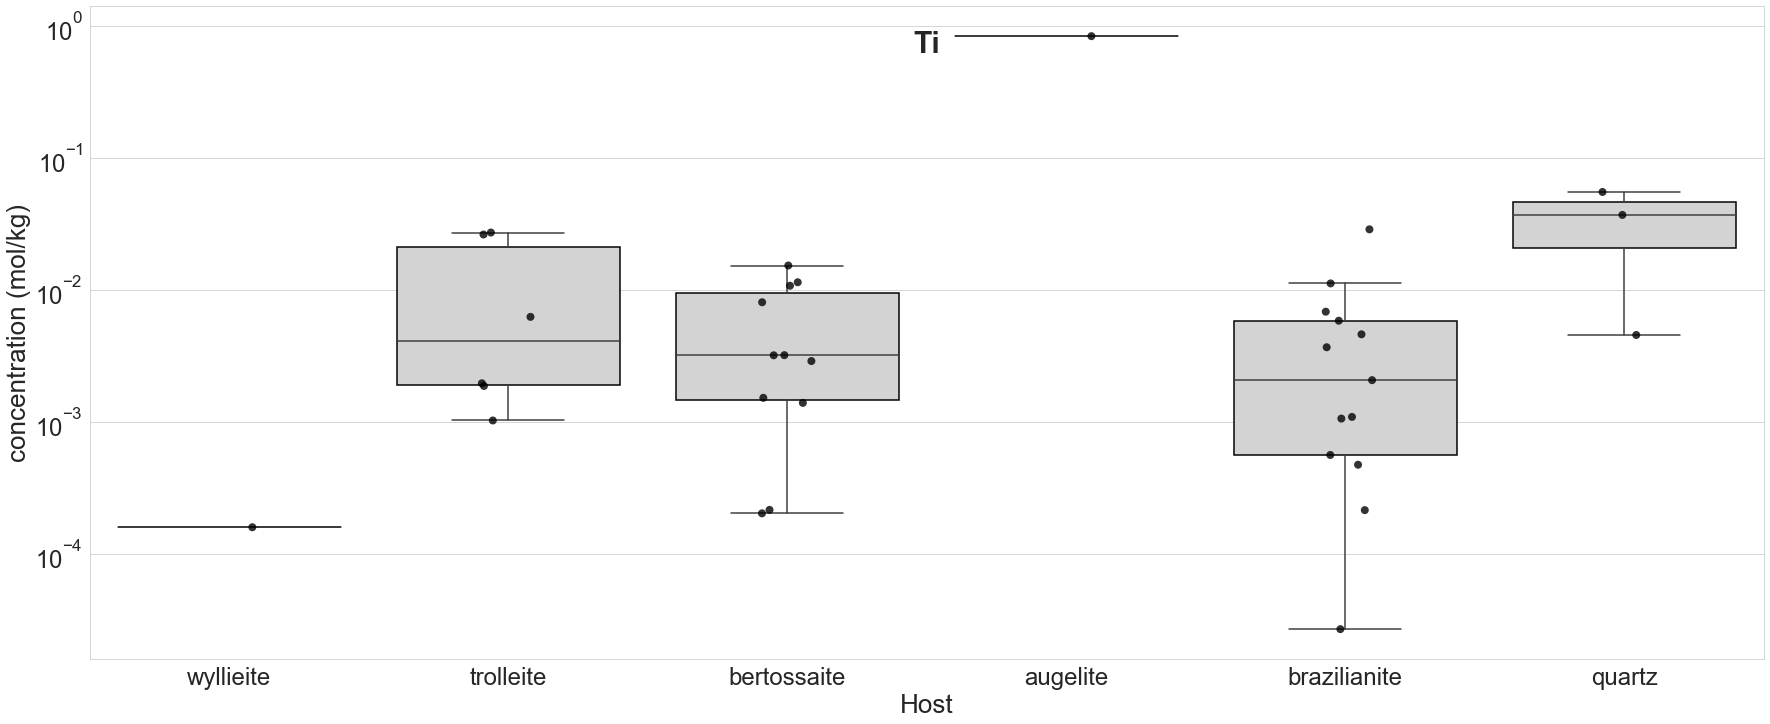

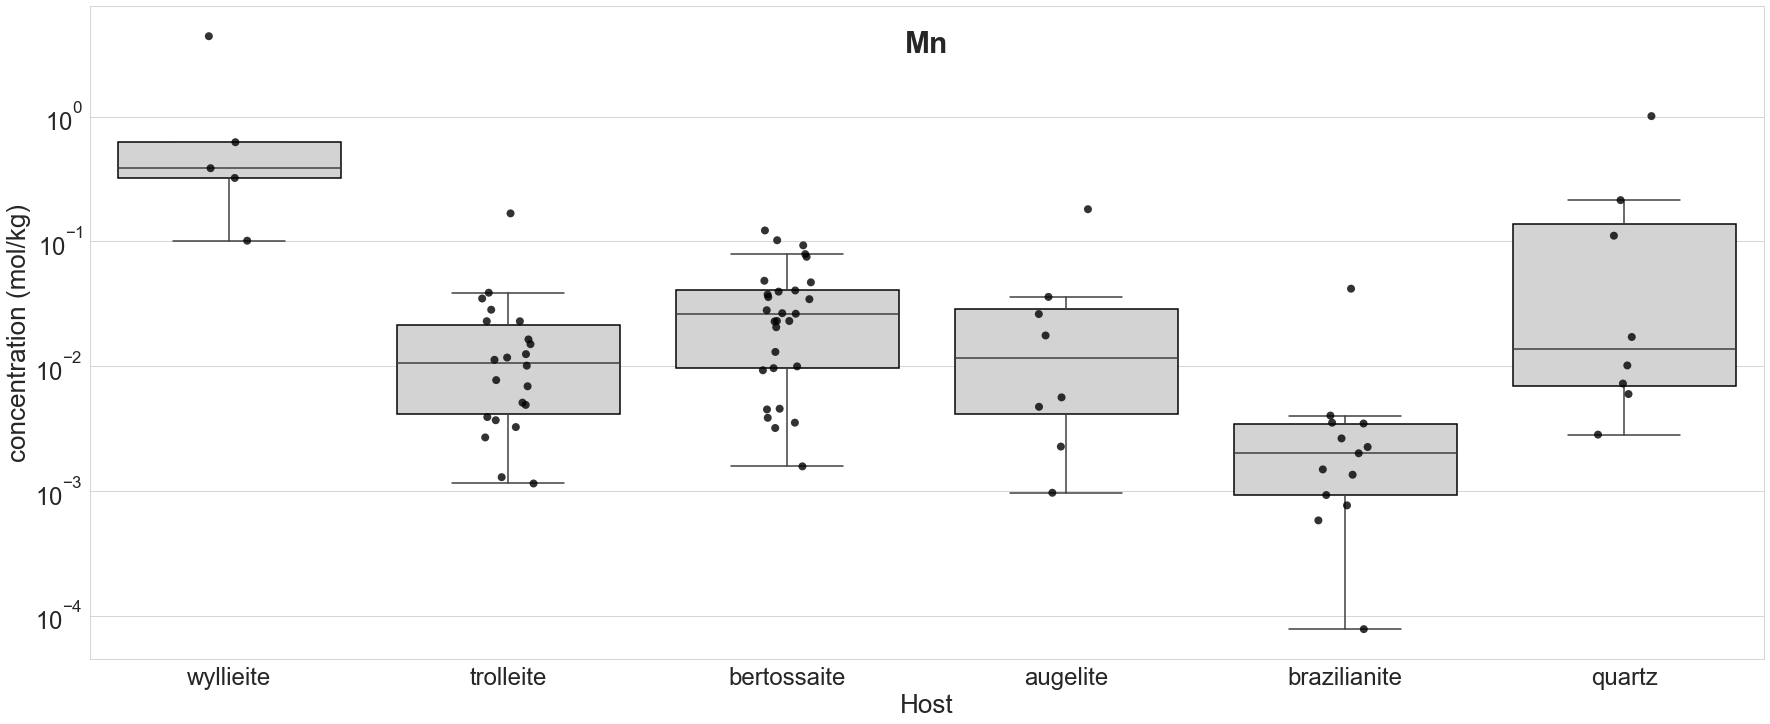

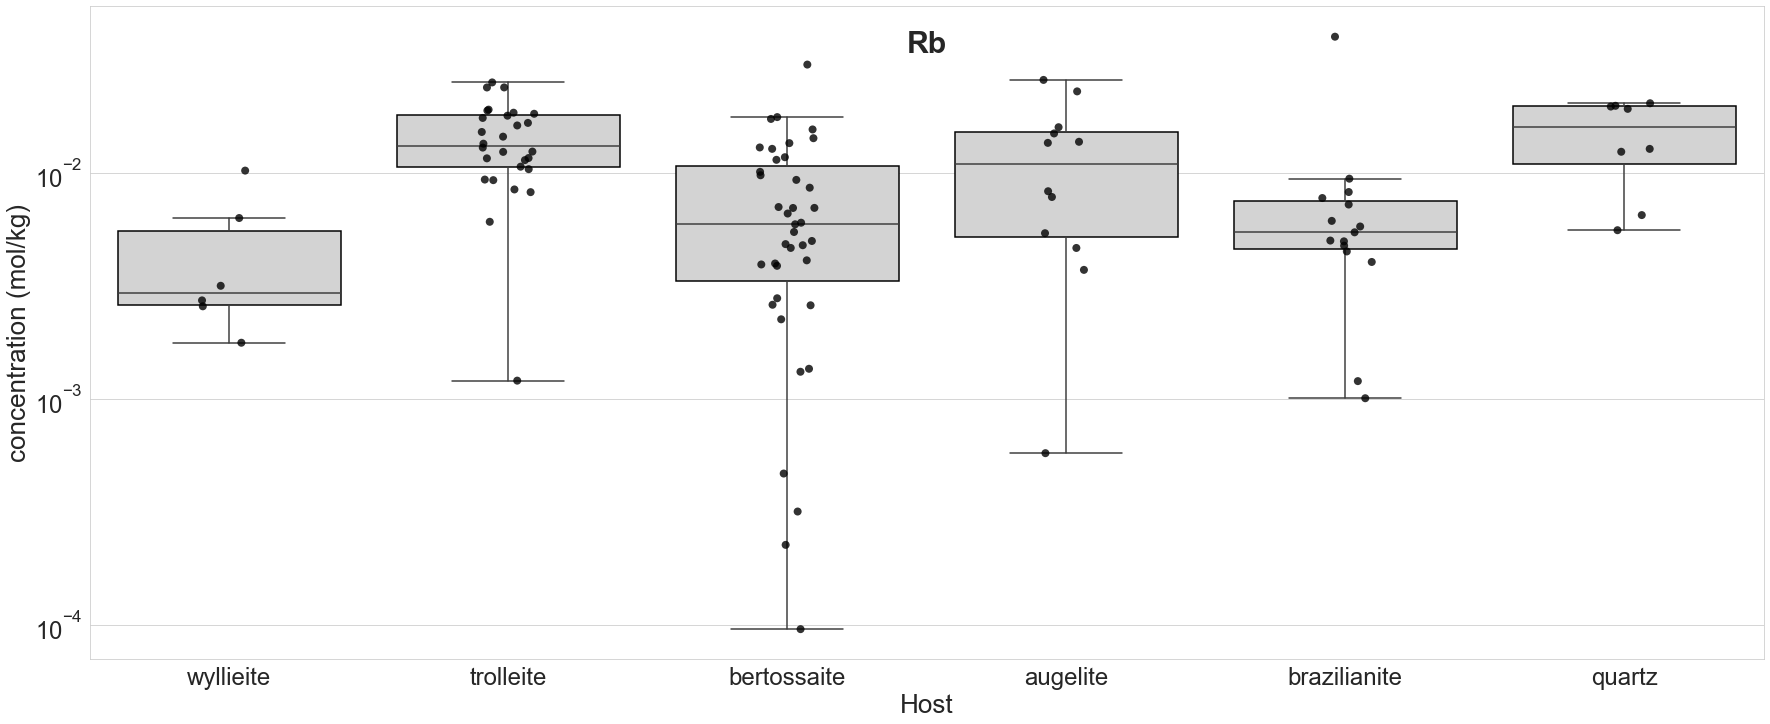

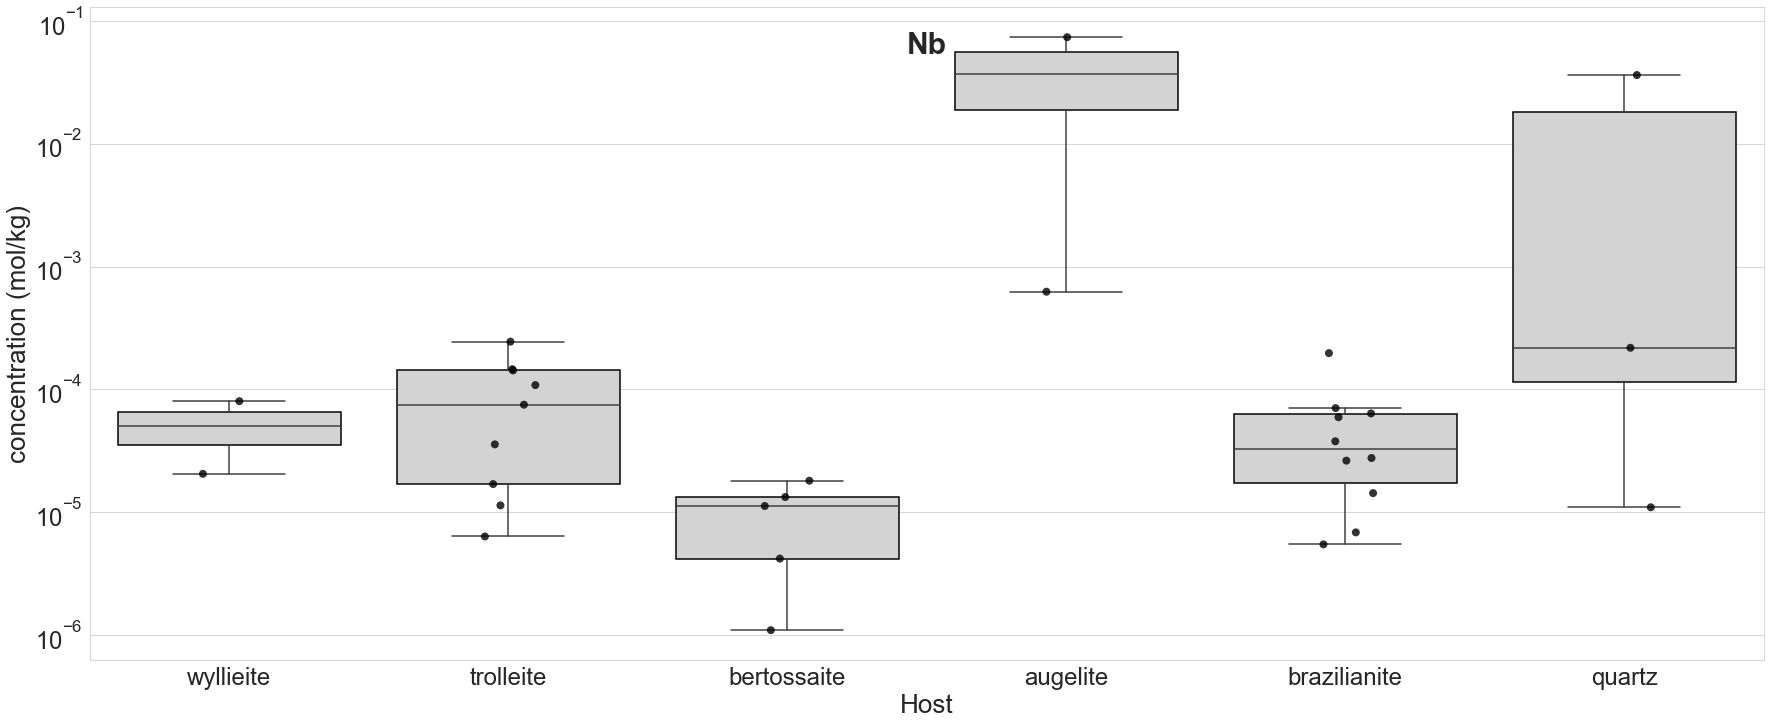

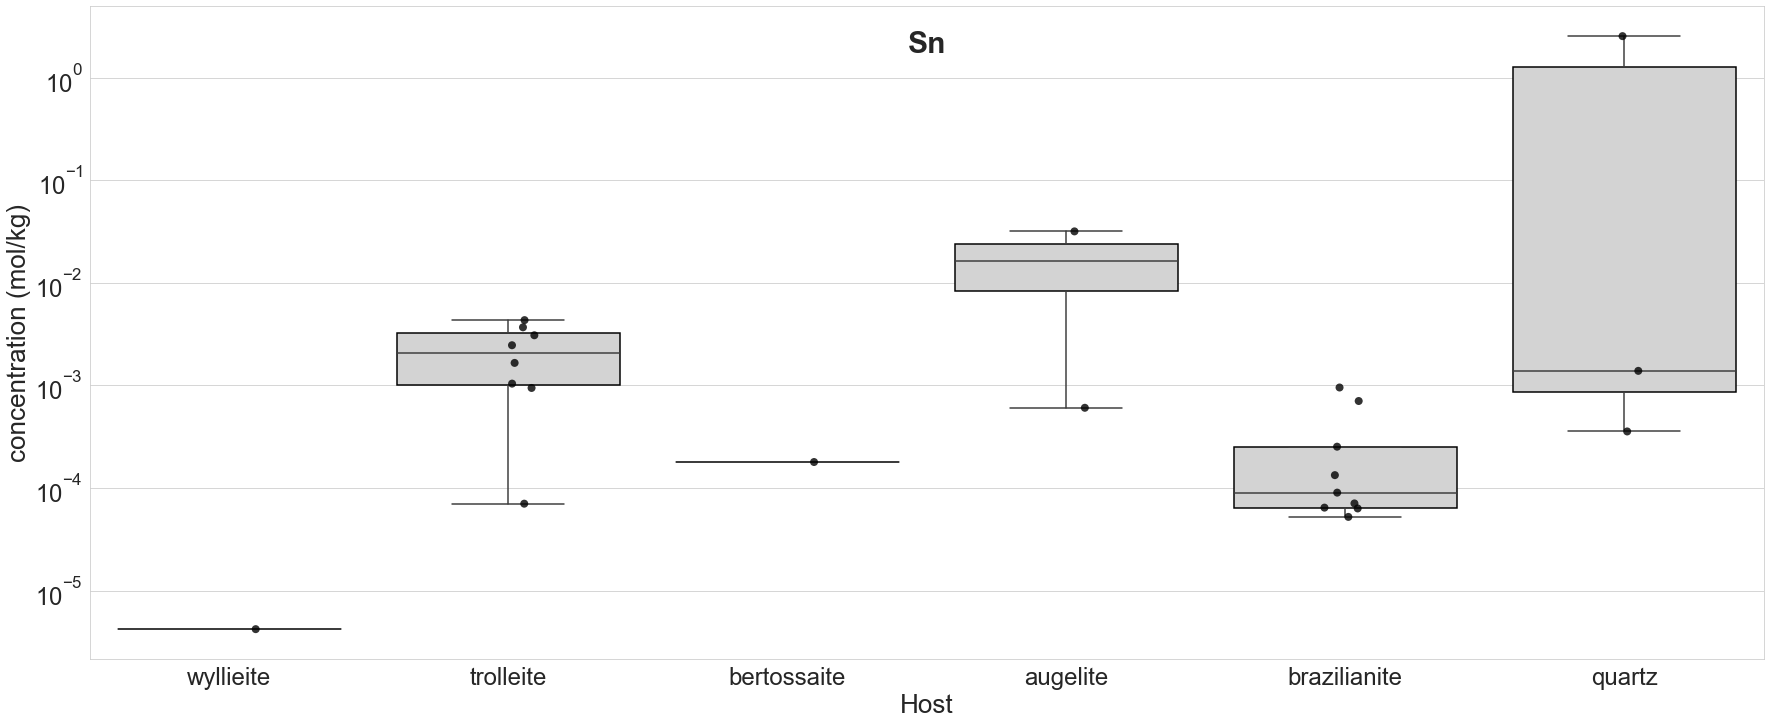

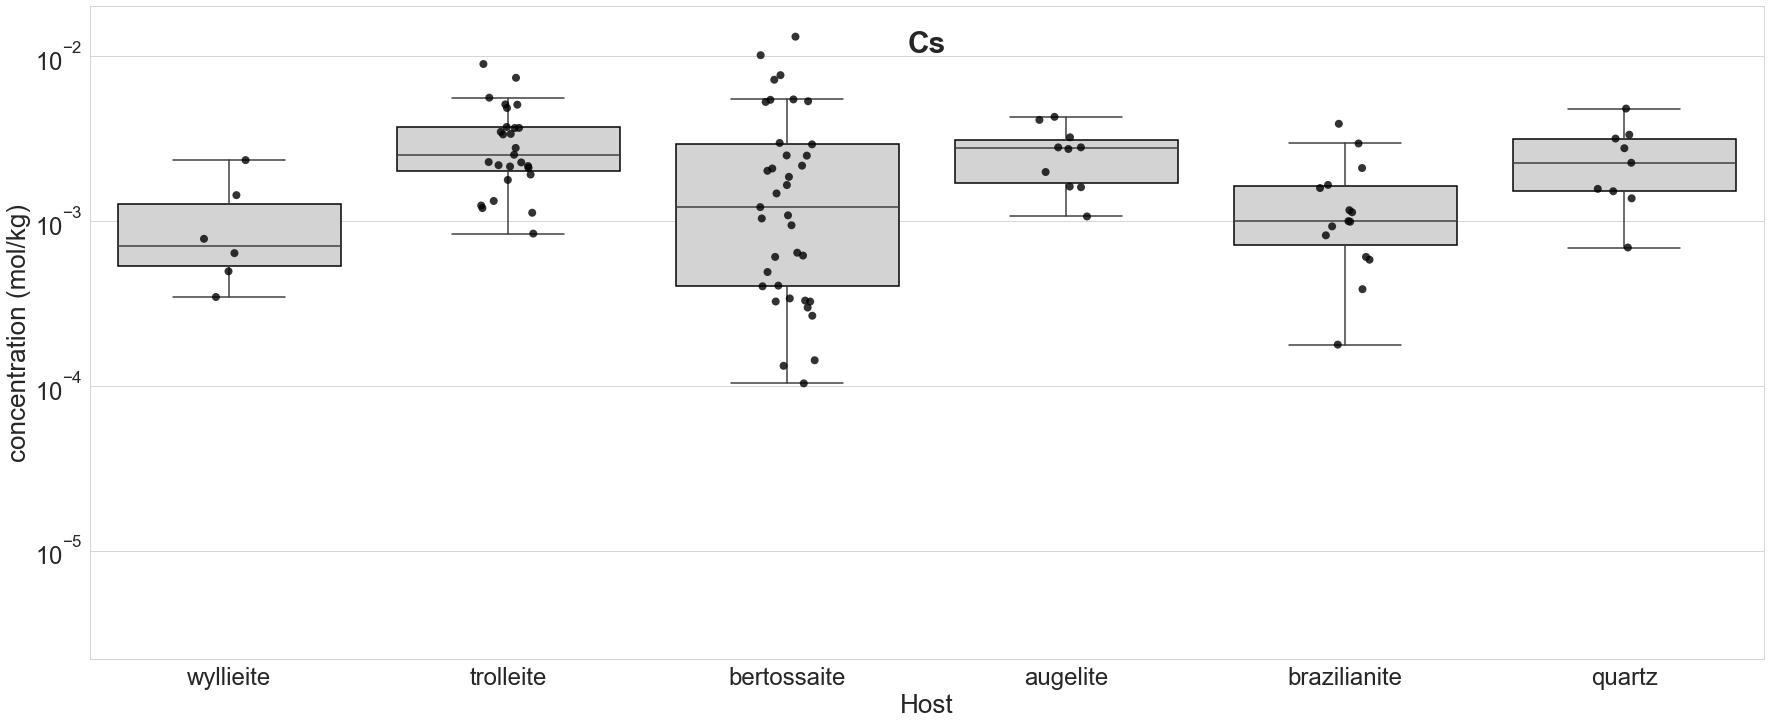

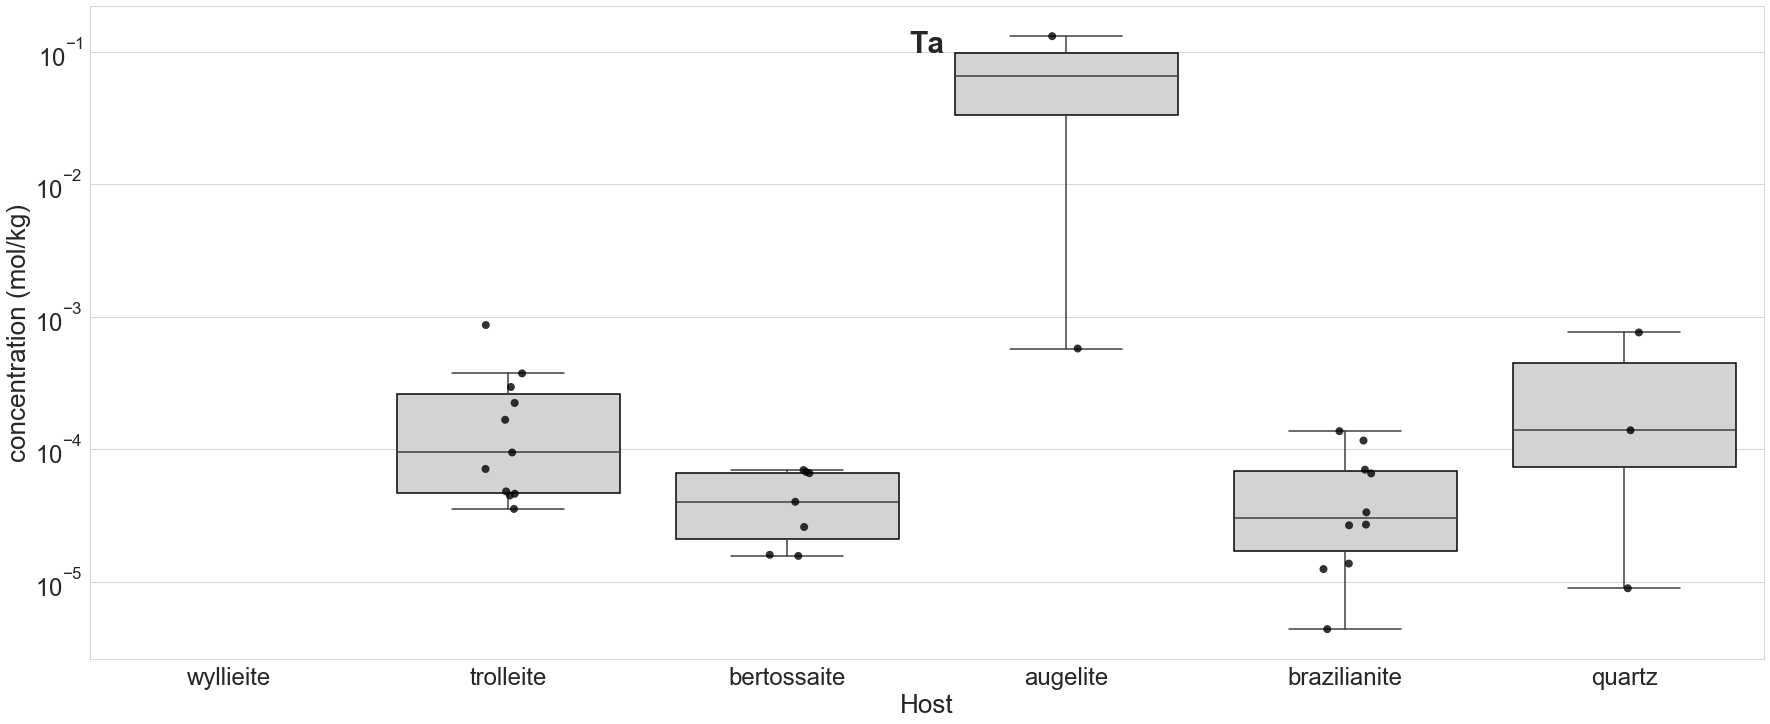

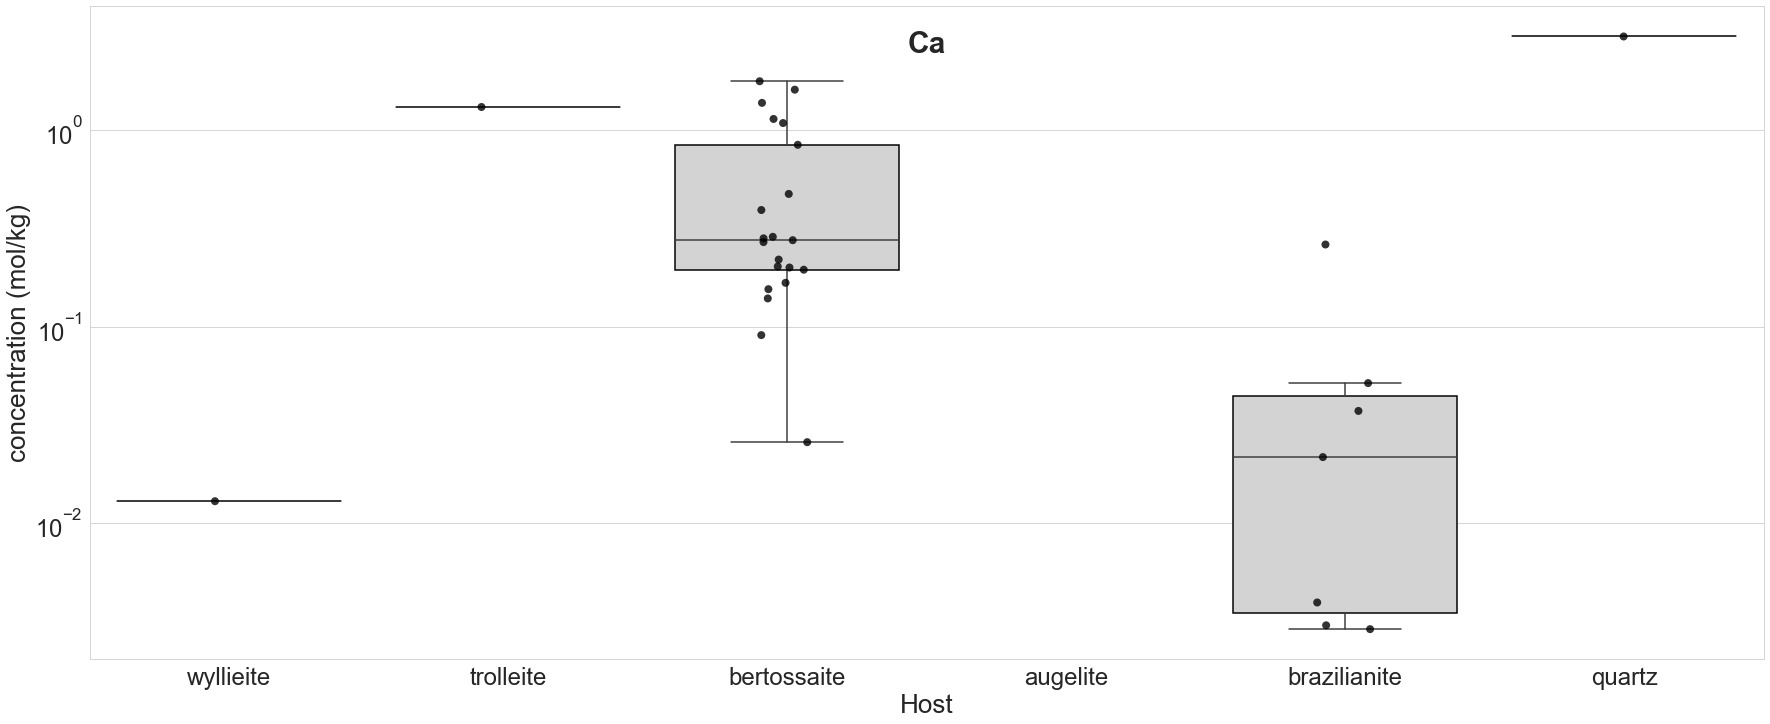

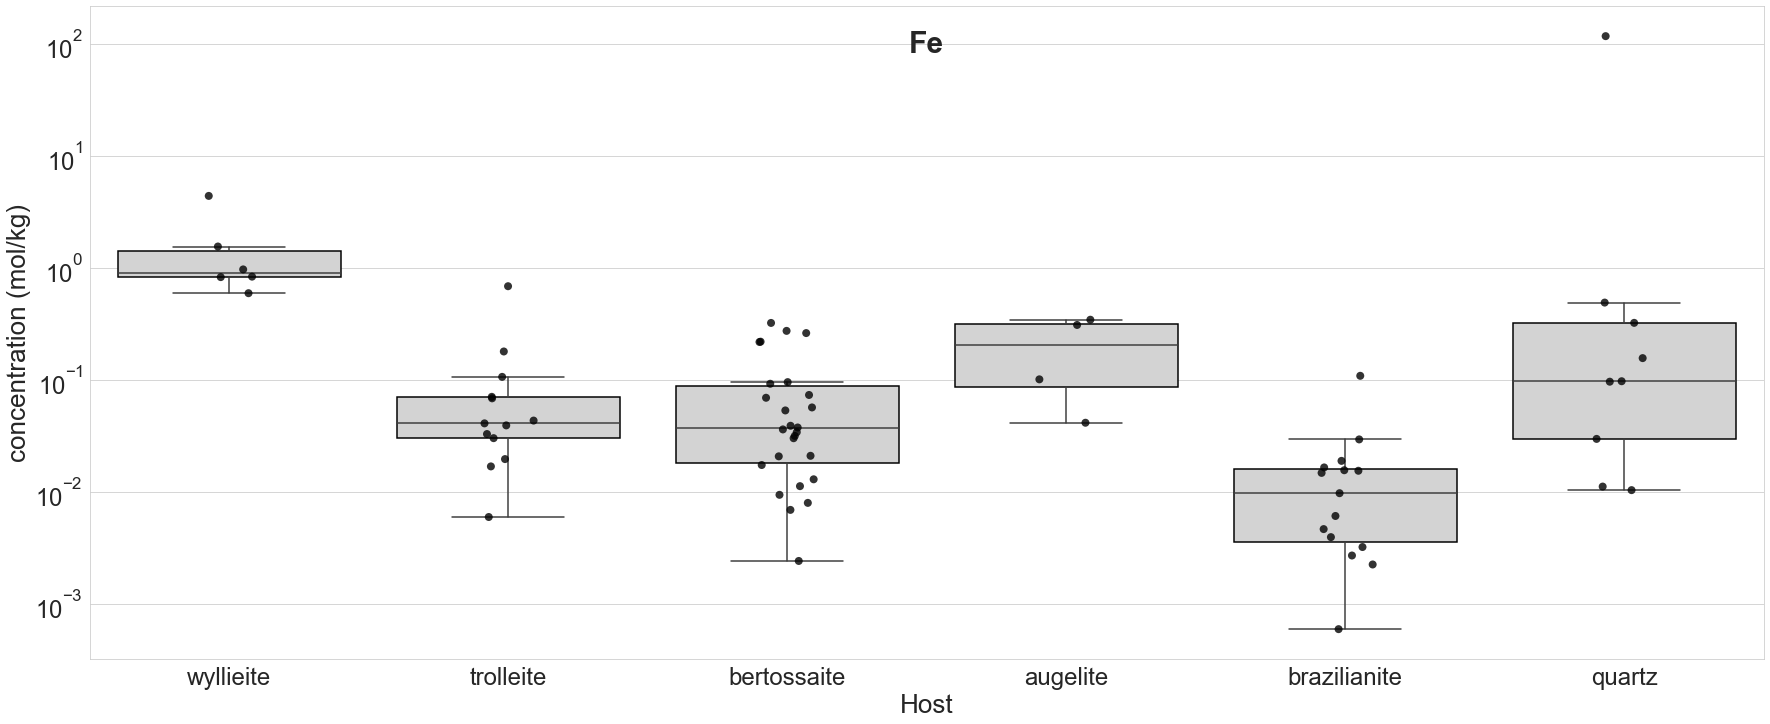

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman']


host_list = ['wyllieite', 'trolleite', 'bertossaite', 'augelite',
#              'montebrasite','rosemaryite','scorzalite', 
             'brazilianite', 'quartz']

elem_list = ['Li', 'B', 'Na', 'Mg',
       'K', 'Ti', 'Mn', 'Rb',
       'Nb', 'Sn', 'Cs', 'Ta', 'Ca', 'Fe']


# Boxplot + data on top for all elements in one host

# df_plot = df_wyl.copy()
# name = str(df_plot.Host.unique()).replace("[","").replace("]","").replace("'","").replace("'","")

# fig = plt.figure(figsize =(30, 12))

# sns.set_style("whitegrid")

# ax = sns.stripplot(data=df_plot, 
# #                    x=x, y=y,
#                    color='k', order = elem_list, size=8, jitter=True, alpha=0.8)
# ax = sns.boxplot(data=df_plot, 
# #                  x=x, y=y,
#                  showfliers = False, order = elem_list)
# ax.set(yscale="log")


# for i,box in enumerate(ax.artists):
#     box.set_edgecolor('black')
#     box.set_facecolor('lightgrey')





# Boxplot + data on top for all hosts

x = 'Host'

for elem in elem_list:
    fig = plt.figure(figsize =(30, 12))

    sns.set_style("whitegrid")

    y = elem
    ax = sns.stripplot(data=df_to_plot, 
                       x=x, y=y,
                       color='k', order = host_list, size=8, jitter=True, alpha=0.8)
    ax = sns.boxplot(data=df_to_plot, 
                     x=x, y=y,
                     showfliers = False, order = host_list)
    ax.set(yscale="log")


    for i,box in enumerate(ax.artists):
        box.set_edgecolor('black')
        box.set_facecolor('lightgrey')



 # Add artistic features to graph
    plt.title(y, fontsize=30,fontweight="bold",y=0.92)#, fontname="Times New Roman")
    plt.xlabel('Host', fontsize=26)
    plt.ylabel('concentration (mol/kg)', fontsize=26)


    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)


    plt.savefig("C:/Users/u0125722/OneDrive - KU Leuven/Buranga/Figures_Drawings/Thesis/plot_boxp_"+y+".pdf")
plt.show()


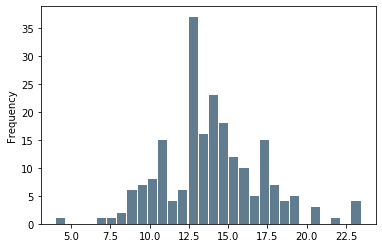

In [12]:
# Generate data on commute times.
size, scale = 1000, 10
salt = df_data['salinity(NaCleq wt%)']


salt.plot.hist(grid=False, bins=30, rwidth=0.9,
                   color='#607c8e')

# plt.grid(axis='y', alpha=0.75)


# Data combinations

In [ ]:
from itertools import combinations

df_comb = df_data[['F', 'Na2O', 'MgO', 'Al2O3',
        'P2O5', 'CaO', 'MnO', 'FeO', 'SrO']]


data_combinations = list(combinations(df_comb.columns, 3))
print(len(data_combinations))
# data_combinations[1000]



for comb in data_combinations:
    comb[0], comb[1], comb[2]
    
    # To DO:
    # 1. Subset dataframe
    # 2. Normalize subset
    # 3. Add metadata to subset
    
    fig = px.scatter_ternary(df_data, a=comb[0], b=comb[1], c=comb[2], 
                             color="Mineral", hover_data=['Sample',"Area",'Analysis'], )

    fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

#     fig.write_image(f"ternary_test_{comb[0]}_{comb[1]}_{comb[2]}.pdf")
    fig.show()

# PCA

In [63]:
#Preprocessing of dataset to fullfill requirements of PCA (only relevant data, , no NaN, closure of data)

df_PCA = df_mh[['Li', 'B', 'Na', 'Mg', 
                 'K', 'Mn', 'Rb',  
                 'Nb', 'Sn', 'Cs', 'Ta',
                 'Ca', 'Fe']]


df_PCA = df_PCA.dropna(axis = 0, how = 'all') #remove lines that have only NaN values

# df_data = df_data.drop(9) #remove lines that have odd values
# print(df_data.loc[9])

# HFSE_names = ['Ti','Nb','Sn',"Ta"]
# df_PCA['HFSE'] = df_PCA[HFSE_names].sum(axis=1) #combine elements that behave the same

# df_PCA = df_PCA.drop(['Mg', 'Al', 'Si', 'P','Sr','Ba', 'W','Ti','Nb','Sn',"Ta"],axis = 'columns') #remove elements that are not relevant

df_PCA = df_PCA.replace(np.NaN, 0) #replace NaN for 0
df_PCA = df_PCA.replace(0.0, 1e-10) #replace 0 for 1x10^-10


df_data_norm = df_PCA.div(df_PCA.sum(axis=1), axis=0) #normalize data --> divide each value by the sum of the values in their rows

# df_data_norm['sum'] = df_data_norm.sum(axis=1)


# print(np.mean(df_data_norm),np.std(df_data_norm))


# df_data
df_data_norm


Li             B        Na            Mg             K  \
34   1.822278e-01  1.448679e-02  0.582937  1.286259e-03  1.182734e-01   
35   3.929792e-01  1.233612e-02  0.406496  6.160327e-03  8.224755e-02   
37   1.423404e-01  2.896272e-11  0.656263  6.868248e-03  8.057684e-02   
38   4.690035e-11  5.430176e-02  0.721933  4.690035e-11  1.273196e-01   
39   2.649658e-01  2.882034e-11  0.195243  1.373317e-02  8.222201e-02   
..            ...           ...       ...           ...           ...   
262  5.334097e-11  5.334097e-11  0.976662  1.485831e-03  5.334097e-11   
263  2.398118e-02  2.619144e-02  0.905410  5.306375e-11  4.135335e-02   
264  3.857833e-11  3.857833e-11  0.740025  3.857833e-11  2.086924e-01   
265  3.912620e-11  3.912620e-11  0.600888  2.226607e-02  3.763835e-01   
269  3.761716e-11  6.322353e-02  0.591499  3.761716e-11  3.339690e-01   

               Mn            Rb            Nb            Sn            Cs  \
34   2.747019e-03  3.793009e-03  2.968049e-11  2.968049e-11  1.560212e-03   
35   1.046366e-02  3.345624e-03  2.927440e-11  2.927440e-11  1.553987e-03   
37   1.168926e-02  5.020195e-03  2.896272e-11  2.896272e-11  2.924940e-03   
38   4.690035e-11  1.308160e-03  4.690035e-11  4.690035e-11  1.538519e-04   
39   2.938770e-02  2.763194e-05  3.238971e-06  5.171422e-05  2.882034e-11   
..            ...           ...           ...           ...           ...   
262  5.334097e-11  5.334097e-11  3.402386e-05  4.815067e-05  5.334097e-11   
263  4.133119e-05  6.364839e-04  2.005652e-05  3.760055e-05  2.041303e-04   
264  1.007655e-02  1.796418e-03  3.857833e-11  3.857833e-11  3.857833e-11   
265  3.912620e-11  2.252659e-04  3.912620e-11  2.371442e-04  3.912620e-11   
269  3.761716e-11  9.701972e-03  3.761716e-11  3.761716e-11  1.606118e-03   

               Ta            Ca            Fe  
34   2.968049e-11  8.185537e-02  1.083304e-02  
35   2.927440e-11  5.710486e-02  2.731276e-02  
37   2.896272e-11  2.896272e-11  9.431744e-02  
38   4.690035e-11  9.498318e-02  4.690035e-11  
39   4.611672e-06  3.978341e-01  1.652683e-02  
..            ...           ...           ...  
262  1.425753e-05  1.155426e-02  1.020107e-02  
263  7.294207e-06  5.306375e-11  2.117212e-03  
264  3.857833e-11  3.857833e-11  3.940925e-02  
265  3.912620e-11  3.912620e-11  3.912620e-11  
269  3.761716e-11  3.761716e-11  3.761716e-11  

[73 rows x 13 columns]

In [64]:
import colleagues.preproc.pre_processing as preproc

df_clr = preproc.clr(df_data_norm)
df_clr


df_clr.sum(axis=1)


df_pca = preproc.pca(df_clr)
df_pca


data_pca = preproc.create_pca_df(df_pca, df_clr)


In [65]:
def position_xy_text(x, y):

    dx_dy = x/y
    dy_dx = y/x
    if x < y:
        offset = 1  # np.arctan(y/x)
    else:
        offset = 1  # np.arctan(x/y)

    # First quadrant
    if (x >= 0) and (y >= 0):
        x += 0.1 * offset
        y += 0.1 * offset
        return x, y
    # Second quadrant
    elif (x < 0) and (y >= 0):
        x -= 0.2 * offset
        y += 0.2 * offset
        return x, y
    # Thrid quadrant
    elif (x < 0) and (y < 0):
        x -= 0.4 * offset
        y -= 0.1 * offset
        return x, y
    # Fourth quadrant
    elif (x >= 0) and (y < 0):
        x += 0.2 * offset
        y -= 0.2 * offset
        return x, y
    else:
        print("xy position of pca loading could not be detrmined")

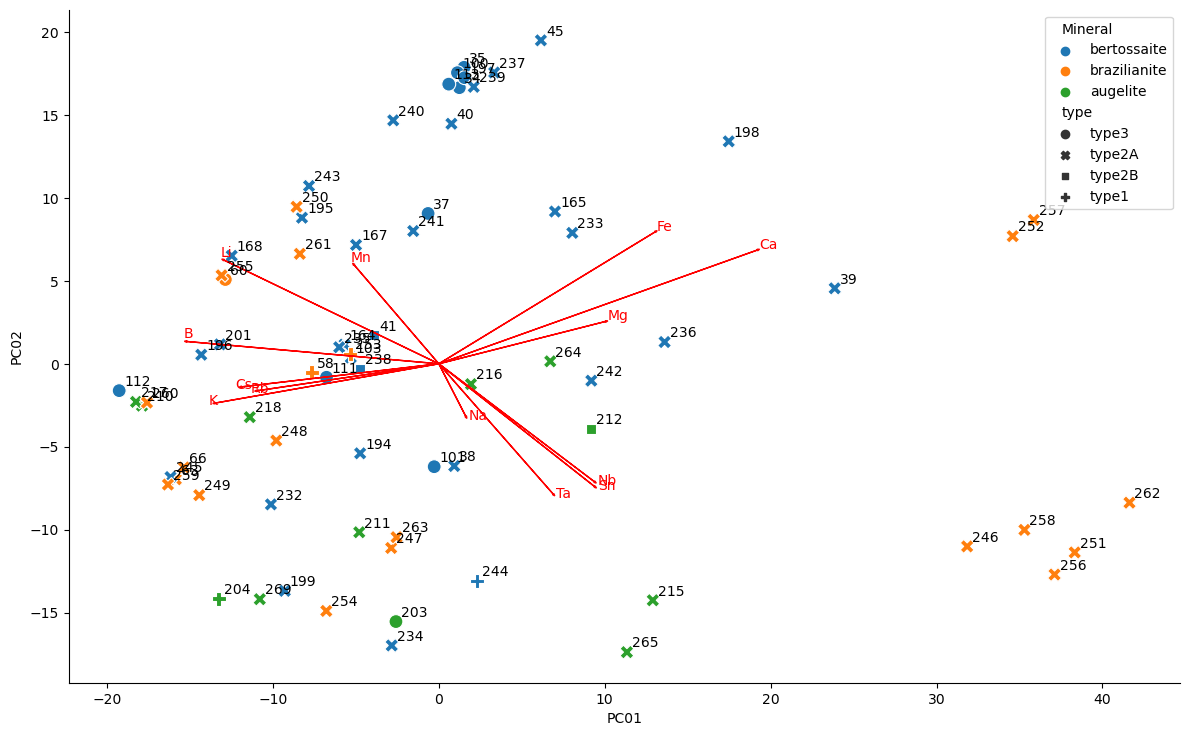

In [66]:
import seaborn as sns

# Calculate PC vectors
xvector = df_pca.components_[0]
yvector = df_pca.components_[1]
# # Transform data
xs = df_pca.transform(df_clr)[:, 0]
ys = df_pca.transform(df_clr)[:, 1]

fig, ax = plt.subplots(figsize=(12, 12), dpi=100)


data_pca[['Mineral', 'type']] = df_data[['Host','type']]



# use 'hue' keyword to indicate which column to use for color_coding
sns.scatterplot(x="PC01", y="PC02", data=data_pca, legend=True, s=100,
               hue="Mineral", style="type") 

ax.set_aspect('equal', adjustable='box')

# Samples
for i in range(len(xs)):
    # Circles project documents (ie rows from csv) as points onto
    ax.text(xs[i]+0.3,
            ys[i]+0.3,
            list(df_clr.index)[i],
            fontsize=10)

for j in range(len(xvector)):
    # Arrows project features (ie columns from csv) as vectors onto PC
    # axes

        ax.arrow(0, 0,
                     xvector[j]*max(xs),
                     yvector[j]*max(ys),
                     color='r',
                     width=0.0005,
                     head_width=0.1)

        position_x, position_y = \
            position_xy_text(xvector[j]*max(xs),
                             yvector[j]*max(ys))

        ax.text(position_x,
                    position_y,
                    list(df_clr.columns)[j],
                    color='r')
        
# ax.set_xlim(-5, 10)
# ax.set_ylim(-10, 5)

sns.despine()

# Set facecolor of figure
plt.gcf().set_facecolor('white')
plt.tight_layout()

# plt.savefig("pca_biplot_test.pdf")
plt.show();

In [ ]:
fig = plt.plot(df_data['Elements'], df_data['C1 chondrite'], '-o')
fig.set_ylim(0, 1)
plt.show()

In [ ]:
# --- filter dataframe for only selected entries, e.g. only phases containing Al

df_Al = df_analysis.query('Al!= 0')
df_Al

In [ ]:
# --- separate data from metadata - only do calculation in data afterwards

df_Al_data = df_Al.drop(['Symbol', 'Stage', 'Mineral', 'Formula', 'Crystal_System',
       'Point_Group', 'Space_Group'], axis=1)


#df_analysis_metadata = df_analysis.drop(['SiO2', 'TiO2', 'Al2O3', 'Cr2O3',
       #'FeO', 'MnO', 'MgO', 'CaO', 'ZnO', 'BaO', 'Na2O', 'K2O', 'F', 'Cl',
       #'Li2O', 'H2O', 'Si', 'Al4', 'Ti', 'Al6', 'Cr', 'Fe', 'Mn', 'Mg', 'Li',
       #'Zn', 'Ca', 'Na', 'K', 'Ba', 'F.1', 'Cl.1', 'OH', 'Mg/(Mg+Fe)', 'XF',
       #'Li7', 'Mg24', 'P31', 'Ca44', 'Sc45', 'Ti46', 'Ti49', 'V51', 'Cr52',
       #'Mn55', 'Co59', 'Sr88', 'Y89', 'Zr91', 'Nb93', 'Sn118', 'Ba137',
       #'La139', 'Ce140', 'Pr141', 'Nd143', 'Sm147', 'Gd157', 'Tb159', 'Dy161',
       #'Ho165', 'Er166', 'Tm169', 'Yb173', 'Lu175', 'Hf178', 'Ta181', 'W182',
       #'Pb206', 'Pb207', 'Pb208', 'Th232', 'U238'], axis=1).drop(48,axis=0)
df_Al_data

In [ ]:
# --- replace values starting with "<" (i.e. below detection limit) to 0.0001

df_analysis_bdl = df_analysis.replace({'NaN': 0.0},regex=True)

# --- change data time from string to float for calculations

#df_analysis_bdl = df_analysis_bdl.astype(float)


In [ ]:
# --- add columns in the dataframe using iloc characters

df_Al_data["M3"] = df_Al_data['Fe2O3'] + df_Al_data['Al2O3']
df_Al_data["M2"] = df_Al_data['MnO'] + df_Al_data['FeO'] + df_Al_data['MgO'] + df_Al_data['CaO']
df_Al_data["A"] = df_Al_data['Li2O'] + df_Al_data['Na2O']
df_Al_data["X"] = df_Al_data['H2O.1'] + df_Al_data['F']
#df_analysis_bdl["Zr/Hf"] = df_analysis_bdl['Zr91']/ df_analysis_bdl['Hf178']
#df_analysis_bdl["Nb/Ti"] = df_analysis_bdl['Nb93']/ df_analysis_bdl['Ti49']
#df_analysis_bdl["Ba/Sr"] = df_analysis_bdl['Ba137']/ df_analysis_bdl['Sr88']
#df_analysis_bdl["Th/U"] = df_analysis_bdl['Th232']/ df_analysis_bdl['U238']
#df_analysis_bdl["REE"] = df_analysis_bdl.iloc[:, 52:65].sum(axis=1)
#df_analysis_bdl["LREE"] = df_analysis_bdl.iloc[:, 52:57].sum(axis=1)
#df_analysis_bdl["HREE"] = df_analysis_bdl.iloc[:, 57:65].sum(axis=1)
#df_analysis_bdl["AlT"] = df_analysis_bdl.iloc[:, [17,19]].sum(axis=1)
#df_analysis_bdl["Al+Ti"] = df_analysis_bdl.iloc[:, [18,19]].sum(axis=1)
#df_analysis_bdl["Fe+Mn+Mg"] = df_analysis_bdl.iloc[:, [21,22,23]].sum(axis=1)
#df_analysis_bdl["Fe+Mn+Mg+Ti"] = df_analysis_bdl.iloc[:, [21,22,23,18]].sum(axis=1)
#df_analysis_bdl["Fe+Mn+Ti-AlVI"] = df_analysis_bdl['Fe']+df_analysis_bdl['Mn']+df_analysis_bdl['Ti']-df_analysis_bdl['Al6']
#df_analysis_bdl["Mg-Li"] = df_analysis_bdl['Mg']-df_analysis_bdl['Li']

In [ ]:
# --- combine calculated data with metadata

df_analysis_bdl['sample'] = df_analysis_metadata['Sample']
df_analysis_bdl['point'] = df_analysis_metadata['Analysis']
df_analysis_bdl['mineral'] = df_analysis_metadata['Mineral']
df_analysis_bdl['context'] = df_analysis_metadata['Context']

In [ ]:
# --- plot figures

fig = px.scatter(df_data, x="Elements", y="C1 chondrite", range_y=[0,1])#color="context", hover_data=["point","mineral"], 

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

#fig.write_image("Nb-TavsSn.pdf");
fig.show()

In [ ]:
# --- normalization function - written by Bram Paredis

def normalize(data, total=None):
    """Normalize data to 100%"""
    if total is None:
        total = data.sum(axis=1)
    return data.divide(total, axis=0) * 100

In [ ]:
# --- define subset within dataset

df_subset = df_Al_data.loc[:, ["M3", "M2", "A"]]
df_subset

In [ ]:
# --- normalize subset using function defined above

df_subset_normalized = normalize(df_subset)

# --- combine calculated data with metadata

df_subset_normalized['symbol'] = df_Al['Symbol']
df_subset_normalized['stage'] = df_Al['Stage']
df_subset_normalized['mineral'] = df_Al['Mineral']
df_subset_normalized['space_group'] = df_Al['Space_Group']
df_subset_normalized['h2o'] = df_Al['H2O.1']

# Phosphates paragenesis analysis

In [ ]:
df_PO4 = pd.read_excel('C:/Users/u0125722/OneDrive - KU Leuven/Buranga/Phosphate_Paragenesis/_Paragenesis.xlsx', 
                        sheet_name='Sheet2')

df_PO4

In [ ]:
df_PO4.loc[:,'mono'] = df_PO4.loc[:,['Li','Na']].sum(axis=1, min_count=1)
df_PO4.loc[:,'diva'] = df_PO4.loc[:,['Ca','Fe','Mn']].sum(axis=1, min_count=1)

df_PO4 = df_PO4.fillna(0)

df_PO4

In [ ]:
# --- ternary plot of normalized subset


# df_subset = df_Al_data.loc[:, ["M3", "M2", "A"]]
# df_subset

A = 'Al'

B = 'OH'

C = 'P'


colors_map = {'Augelite' : 'rgb(51,255,51)',
          'Bertossaite' : 'rgb(204,121,167)',
          'Brazilianite' : 'rgb(250,120,10)',
          'Quartz' : 'rgb(240,228,66)',
          'Scorzalite' : 'rgb(0,0,255)',
          'Trolleite' : 'rgb(0,158,115)',
          'Wyllieite' : 'rgb(0,170,250)',
             'Rosemaryite' : 'rgb(255,5,5)',
             'Montebrasite' : 'rgb(242,88,88)'}


fig = px.scatter_ternary(df_PO4, a=A, b=B, c=C,
                          color="Mineral",
                         symbol="Mineral",
                        color_discrete_map=colors_map)
#                           ,range_color=[1,5],color_continuous_scale='Inferno',hover_data=["Mineral"]))

fig.update_traces(marker=dict(size=10, 
                              line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)

fig.update_layout(template="plotly_white")


fig.write_image("C:/Users/u0125722/OneDrive - KU Leuven/Buranga/_Article3-MH_transition/figures/chemometric_diagrams/ternary_"+A+"_"+B+"_"+C+".pdf")

# .write_image(data_dir+"figures/plot_ternary_NaKLi_mol.pdf")# + df_subset.iloc[0][7] + ".pdf")

fig.show()

# Data from Hulsbosch

In [8]:
df_NH_FI = pd.read_csv('C:/Users/u0125722/OneDrive - KU Leuven/Buranga/_Article3-MH_transition/Hulsbosch&Muchez(2020)-Lithos/Hulsbosch_Muchez(2020)-LAICPMS-FI.csv', 
                          encoding = "ANSI")

df_NH_FI

Sample            Name Zone Host Type     Ref    Li     Na      Mg  \
0       1.0   1702-3-H-B-12   WZ   Qz  L1a   H&M20   443  71755     365   
1       3.0  1702-3-H-B-10A   WZ   Qz  L1a   H&M20  4261  36256   51178   
2       4.0   1702-3-H-B-15   WZ   Qz  L1a   H&M20   717  70382     152   
3       5.0   1702-3-H-B-16   WZ   Qz  L1b   H&M20   645  82206    2214   
4       6.0   1702-3-H-B-14   WZ   Qz  L1a   H&M20  1526  68317   25900   
..      ...             ...  ...  ...  ...     ...   ...    ...     ...   
142     NaN        11619A-8    3  Tur    I  H&al16   NaN  37000  <12000   
143     NaN     11619A-8(2)    3  Tur    I  H&al16   NaN  36000   30000   
144     NaN     11619A-8(3)    3  Tur    I  H&al16   NaN  34000   23000   
145     NaN     11619A-8(4)    3  Tur    I  H&al16   NaN  39000   39000   
146     NaN        11619A-9    3  Tur   II  H&al16   NaN  75000  100000   

         P  ...    Mn     Fe    Rb   Sr   Nb   Sn    Cs   Ba   Ta     W  
0      520  ...   313   1052  1691   52  1.1   14   272   84  1.8   7.1  
1    23167  ...   859  <7217  1467  243   26  252   146  501   54  <4.2  
2     1184  ...  7423  10814  1502   63  3.8  104   166  160  1.4   0.7  
3     1434  ...   246   <329  1197   51  0.9   32   259   53  1.4   0.3  
4     5204  ...  1200   3020  2187   86  2.1   51   169  148  5.2   5.8  
..     ...  ...   ...    ...   ...  ...  ...  ...   ...  ...  ...   ...  
142    NaN  ...   NaN    NaN   700  NaN  NaN   17   210  NaN  NaN    78  
143    NaN  ...   NaN    NaN   250  NaN  NaN   23   140  NaN  NaN    66  
144    NaN  ...   NaN    NaN   360  NaN  NaN   25   100  NaN  NaN   101  
145    NaN  ...   NaN    NaN   470  NaN  NaN   30   210  NaN  NaN    72  
146    NaN  ...   NaN    NaN   790  NaN  NaN   52  1800  NaN  NaN   133  

[147 rows x 21 columns]

In [9]:
df_NH_FI_data = df_NH_FI.drop(['Sample','Name', 'Zone','Host', 'Type','Ref'], axis=1)

#separate data from metadata - only do calculation in data afterwards
df_metadata = df_NH_FI[['Sample','Name', 'Zone','Host', 'Type','Ref']]

print(df_NH_FI_data.columns)

df_NH_FI_data

Index(['Li', 'Na', 'Mg', 'P', 'K', 'Mn', 'Fe', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs',
       'Ba', 'Ta', 'W'],
      dtype='object')


Li     Na      Mg      P      K    Mn     Fe    Rb   Sr   Nb   Sn  \
0     443  71755     365    520  22478   313   1052  1691   52  1.1   14   
1    4261  36256   51178  23167  61347   859  <7217  1467  243   26  252   
2     717  70382     152   1184  23249  7423  10814  1502   63  3.8  104   
3     645  82206    2214   1434  13696   246   <329  1197   51  0.9   32   
4    1526  68317   25900   5204  16206  1200   3020  2187   86  2.1   51   
..    ...    ...     ...    ...    ...   ...    ...   ...  ...  ...  ...   
142   NaN  37000  <12000    NaN  11600   NaN    NaN   700  NaN  NaN   17   
143   NaN  36000   30000    NaN   7900   NaN    NaN   250  NaN  NaN   23   
144   NaN  34000   23000    NaN   2500   NaN    NaN   360  NaN  NaN   25   
145   NaN  39000   39000    NaN   8400   NaN    NaN   470  NaN  NaN   30   
146   NaN  75000  100000    NaN  34700   NaN    NaN   790  NaN  NaN   52   

       Cs   Ba   Ta     W  
0     272   84  1.8   7.1  
1     146  501   54  <4.2  
2     166  160  1.4   0.7  
3     259   53  1.4   0.3  
4     169  148  5.2   5.8  
..    ...  ...  ...   ...  
142   210  NaN  NaN    78  
143   140  NaN  NaN    66  
144   100  NaN  NaN   101  
145   210  NaN  NaN    72  
146  1800  NaN  NaN   133  

[147 rows x 15 columns]

In [10]:
df_reference = pd.read_csv('C:/Users/u0125722/OneDrive - KU Leuven/Python_Scripts/_DATA/_Oxides_mass.csv', 
                    encoding = "ANSI", 
                   index_col = 0)


df_reference.columns = ['H', 'Li', 'Be', 'B', 'C', 'F', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'Ti2O3',
       'V', 'Cr', 'Mn', 'Fe2O3', 'Fe', 'Ni', 'Co', 'Cu', 'Zn',
       'Ga', 'Ge', 'As', 'Rb', 'Sr', 'Y', 'Zr', 'Nb',
       'Mo', 'Sn', 'Sb', 'Cs', 'Ba', 'La', 'Ce', 'Ce2O3',
       'Pr', 'Nd', 'Sm', 'Eu', 'EuO', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W',
       'Au', 'Pb', 'Th', 'U']


reference_oxides = df_reference[(df_reference.columns) & (df_NH_FI_data.columns)]



    # --- create an array with molecular weights of oxides
    
molar_mass = reference_oxides.iloc[4,:]



print(reference_oxides.columns, len(reference_oxides.columns), '\n\n', molar_mass)

reference_oxides

Index(['Li', 'Na', 'Mg', 'P', 'K', 'Mn', 'Fe', 'Rb', 'Sr', 'Nb', 'Sn', 'Cs',
       'Ba', 'Ta', 'W'],
      dtype='object') 15 

 Li      6.94070
Na     22.98947
Mg     24.30440
P      30.97226
K      39.09770
Mn     54.93740
Fe     55.84640
Rb     85.46750
Sr     87.61940
Nb     92.90490
Sn    118.68880
Cs    132.90510
Ba    137.33940
Ta    180.94640
W     183.85000
Name: Atom_wt, dtype: float64


C:\Users\u0125722\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead



Li         Na         Mg           P          K         Mn  \
Oxide                                                                           
Mol_wt       29.88140  61.978940  40.304400  141.944520  94.195400  70.937400   
Conv_Factor   0.46457   0.741857   0.603036    0.436421   0.830147   0.774457   
Ox            1.00000   1.000000   1.000000    5.000000   1.000000   1.000000   
Cat           2.00000   2.000000   1.000000    2.000000   2.000000   1.000000   
Atom_wt       6.94070  22.989470  24.304400   30.972260  39.097700  54.937400   

                    Fe          Rb          Sr          Nb         Sn  \
Oxide                                                                   
Mol_wt       71.846400  186.935000  103.619400  265.809800  150.68880   
Conv_Factor   0.777311    0.914412    0.845595    0.699044    0.78765   
Ox            1.000000    1.000000    1.000000    5.000000    2.00000   
Cat           1.000000    2.000000    1.000000    2.000000    1.00000   
Atom_wt      55.846400   85.467500   87.619400   92.904900  118.68880   

                     Cs         Ba          Ta        W  
Oxide                                                    
Mol_wt       281.810200  153.33940  441.892800  231.850  
Conv_Factor    0.943226    0.89566    0.818967    0.793  
Ox             1.000000    1.00000    5.000000    3.000  
Cat            2.000000    1.00000    2.000000    1.000  
Atom_wt      132.905100  137.33940  180.946400  183.850

In [11]:
df_NH_FI_data_bdl = df_NH_FI_data.copy()         
            
df_NH_FI_data_bdl = df_NH_FI_data_bdl.replace({'<': np.nan},regex=True).apply(pd.to_numeric)

df_NH_FI_data_bdl[df_NH_FI_data_bdl <= 1e-5] = np.nan

df_NH_FI_data_bdl

Li     Na        Mg        P        K      Mn       Fe      Rb  \
0     443.0  71755     365.0    520.0  22478.0   313.0   1052.0  1691.0   
1    4261.0  36256   51178.0  23167.0  61347.0   859.0      NaN  1467.0   
2     717.0  70382     152.0   1184.0  23249.0  7423.0  10814.0  1502.0   
3     645.0  82206    2214.0   1434.0  13696.0   246.0      NaN  1197.0   
4    1526.0  68317   25900.0   5204.0  16206.0  1200.0   3020.0  2187.0   
..      ...    ...       ...      ...      ...     ...      ...     ...   
142     NaN  37000       NaN      NaN  11600.0     NaN      NaN   700.0   
143     NaN  36000   30000.0      NaN   7900.0     NaN      NaN   250.0   
144     NaN  34000   23000.0      NaN   2500.0     NaN      NaN   360.0   
145     NaN  39000   39000.0      NaN   8400.0     NaN      NaN   470.0   
146     NaN  75000  100000.0      NaN  34700.0     NaN      NaN   790.0   

        Sr    Nb     Sn      Cs     Ba    Ta      W  
0     52.0   1.1   14.0   272.0   84.0   1.8    7.1  
1    243.0  26.0  252.0   146.0  501.0  54.0    NaN  
2     63.0   3.8  104.0   166.0  160.0   1.4    0.7  
3     51.0   0.9   32.0   259.0   53.0   1.4    0.3  
4     86.0   2.1   51.0   169.0  148.0   5.2    5.8  
..     ...   ...    ...     ...    ...   ...    ...  
142    NaN   NaN   17.0   210.0    NaN   NaN   78.0  
143    NaN   NaN   23.0   140.0    NaN   NaN   66.0  
144    NaN   NaN   25.0   100.0    NaN   NaN  101.0  
145    NaN   NaN   30.0   210.0    NaN   NaN   72.0  
146    NaN   NaN   52.0  1800.0    NaN   NaN  133.0  

[147 rows x 15 columns]

In [12]:
df_mol = df_NH_FI_data_bdl.div((molar_mass*1000), axis='columns')

df_mol.loc[:,'NbTa'] = df_mol.loc[:,['Nb','Ta']].sum(axis=1, min_count=1)
df_mol["Nb/Ta"] = df_mol['Nb'] / (df_mol['Ta'].replace(0, np.nan))
df_mol["Li/Na"] = df_mol['Li'] / df_mol['Na']
df_mol["K/Na"] = df_mol['K'] / df_mol['Na']
df_mol["K/Cs"] = df_mol['K'] / df_mol['Cs']
df_mol["K/Rb"] = df_mol['K'] / df_mol['Rb']
df_mol["Cs/Na"] = df_mol['Cs'] / df_mol['Na']
df_mol["Rb/Na"] = df_mol['Rb'] / df_mol['Na']
df_mol["Rb/Cs"] = df_mol['Rb'] / df_mol['Cs']

df_mol["Ta#"] = (df_mol['Ta'] / (df_mol['NbTa']))*100
df_mol["Mn#"] = (df_mol['Mn'] / (df_mol.loc[:,['Mn','Fe']].sum(axis=1, min_count=1)))*100

df_mol["Na%"] = df_NH_FI_data_bdl['Na'] / 10000
df_mol["Li%"] = df_NH_FI_data_bdl['Li'] / 10000
df_mol["K%"] = df_NH_FI_data_bdl['K'] / 10000
df_mol["Rb%"] = df_NH_FI_data_bdl['Rb'] / 10000
df_mol["Cs%"] = df_NH_FI_data_bdl['Cs'] / 10000

df_mol["P%"] = df_NH_FI_data_bdl['P'] / 10000

df_mol.loc[:,'Cl'] = df_mol.loc[:,['Li','Na','K']].sum(axis=1, min_count=1)

df_mol.loc[:,'Alkalis'] = df_mol.loc[:,['Li','Na','K','Rb','Cs']].sum(axis=1, min_count=1)
df_mol.loc[:,'Alkalis%'] = df_mol.loc[:,['Li%','Na%','K%','Rb%','Cs%']].sum(axis=1, min_count=1)


df_mol[['Sample','Name', 'Zone','Host', 'Type','Ref']] = df_metadata[['Sample','Name', 'Zone','Host', 'Type','Ref']]

df_mol

Li        Na        Mg         P         K        Mn        Fe  \
0    0.063826  3.121212  0.015018  0.016789  0.574919  0.005697  0.018837   
1    0.613915  1.577070  2.105709  0.747992  1.569069  0.015636       NaN   
2    0.103304  3.061489  0.006254  0.038228  0.594639  0.135117  0.193638   
3    0.092930  3.575811  0.091095  0.046299  0.350302  0.004478       NaN   
4    0.219863  2.971665  1.065651  0.168021  0.414500  0.021843  0.054077   
..        ...       ...       ...       ...       ...       ...       ...   
142       NaN  1.609432       NaN       NaN  0.296693       NaN       NaN   
143       NaN  1.565934  1.234344       NaN  0.202058       NaN       NaN   
144       NaN  1.478938  0.946331       NaN  0.063942       NaN       NaN   
145       NaN  1.696429  1.604648       NaN  0.214846       NaN       NaN   
146       NaN  3.262363  4.114481       NaN  0.887520       NaN       NaN   

           Rb        Sr        Nb  ...      P%        Cl   Alkalis  Alkalis%  \
0    0.019785  0.000593  0.000012  ...  0.0520  3.759957  3.781789    9.6639   
1    0.017164  0.002773  0.000280  ...  2.3167  3.760054  3.778317   10.3477   
2    0.017574  0.000719  0.000041  ...  0.1184  3.759431  3.778254    9.6016   
3    0.014005  0.000582  0.000010  ...  0.1434  4.019043  4.034997    9.8003   
4    0.025589  0.000982  0.000023  ...  0.5204  3.606027  3.632888    8.8405   
..        ...       ...       ...  ...     ...       ...       ...       ...   
142  0.008190       NaN       NaN  ...     NaN  1.906125  1.915895    4.9510   
143  0.002925       NaN       NaN  ...     NaN  1.767992  1.771971    4.4290   
144  0.004212       NaN       NaN  ...     NaN  1.542880  1.547845    3.6960   
145  0.005499       NaN       NaN  ...     NaN  1.911275  1.918354    4.8080   
146  0.009243       NaN       NaN  ...     NaN  4.149883  4.172670   11.2290   

     Sample            Name  Zone  Host  Type     Ref  
0       1.0   1702-3-H-B-12    WZ    Qz   L1a   H&M20  
1       3.0  1702-3-H-B-10A    WZ    Qz   L1a   H&M20  
2       4.0   1702-3-H-B-15    WZ    Qz   L1a   H&M20  
3       5.0   1702-3-H-B-16    WZ    Qz   L1b   H&M20  
4       6.0   1702-3-H-B-14    WZ    Qz   L1a   H&M20  
..      ...             ...   ...   ...   ...     ...  
142     NaN        11619A-8     3   Tur     I  H&al16  
143     NaN     11619A-8(2)     3   Tur     I  H&al16  
144     NaN     11619A-8(3)     3   Tur     I  H&al16  
145     NaN     11619A-8(4)     3   Tur     I  H&al16  
146     NaN        11619A-9     3   Tur    II  H&al16  

[147 rows x 41 columns]

In [95]:
   # --- plot figures
    
df_NH_FI_data_bdl['K/Rb'] = df_NH_FI_data_bdl['K']/df_NH_FI_data_bdl['Rb']
df_NH_FI_data_bdl['K/Cs'] = df_NH_FI_data_bdl['K']/df_NH_FI_data_bdl['Cs']

df_NH_FI_data_bdl[['Sample','Name', 'Zone','Host', 'Type','Ref']] = df_metadata[['Sample','Name', 'Zone','Host', 'Type','Ref']]

    
df_to_plot = df_mol
x = 'Cl'
y = 'Rb/Cs'

# size = df_data['Fe'].fillna(1)


fig = px.scatter(df_to_plot, x=x, y=y,
                 symbol = 'Host', 
                 color = 'Zone', 
#                  hover_data=["sample",'piece','field','analysis'],
#                  size = size,
                 width=700, height=500,
#                  category_orders={"Host": ["wyllieite", 'montebrasite',
#                                            "rosemaryite", "trolleite", 
#                                            "bertossaite",'scorzalite',
#                                           'augelite','brazilianite', 'quartz']},
#                  color_discrete_map=colors_map, # replaces default color mapping by value
#                 log_x=True, log_y=True,
#                 labels={x: x + " [mol/kg]",
#                         y: y + " [mol/kg]"}
                )

fig.update_layout(template="simple_white")

fig.update_layout(showlegend=True,
#                   legend=dict(x=0.0,
#                               y=0.99,
#                               traceorder="normal")
                 )

fig.update_traces(marker=dict(size=10, 
                              line=dict(width=0.8,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'),
                  opacity=0.85)



fig.update_xaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")
fig.update_yaxes(ticks='inside',zeroline=False,linecolor="black",showgrid=False,mirror= "allticks")

fig.update_xaxes(range=(0,5))
fig.update_yaxes(range=(0,40))

# fig.update_xaxes(tickvals=[0,0.2,0.4,0.6,0.8,1,1.2,1.4])
# fig.update_yaxes(tickvals=[0,0.25,0.5,0.75,1,1.25,1.5])


# fig.write_image('C:/Users/u0125722/OneDrive - KU Leuven/Buranga/Figures_Drawings/Thesis/plot_binary-ppm_NH-' 
#                 + 'K-Rb' + '_' + 'Cs' + '.pdf');

fig.show()

In [78]:
# --- group dataframe into cluster defined by host and type and sabe the mean values for it group
df_zones = df_NH_FI_data_bdl.groupby(by=["Zone"], dropna=False).mean()

        # ---- save an array with the classifiers of each group 
Classifiers = df_zones.index.to_numpy()

        # ---- input the array with classifiers as columns in the grouped dataframe
host_lst = [] # creates an empty list to receive classifiers

for i in range(len(Classifiers)):  # append classifiers to the empty lists using the index of original dataframe
    host_lst.append(Classifiers[i][0])

df_zones['Zone'] = host_lst #input lists as columns of grouped dataframe


# df_Host.to_csv('Buranga_FI_combined_datasets_median.csv',index=True)

df_zones

Li            Na            Mg            P  \
Zone                                                                   
1                       NaN  32916.666667  16250.000000          NaN   
2                       NaN  60410.256410  48423.076923          NaN   
3                       NaN  59785.714286  58769.230769          NaN   
CZ              8258.454545  28606.545455    682.277778    89.333333   
Greis RZ        1260.416667  49363.250000   4089.600000  7144.750000   
IZ (+Cleav RZ)  1820.333333  55605.250000   3922.333333  4309.000000   
WZ              2079.386364  66251.681818  11084.025000  9213.433333   

                           K           Mn            Fe           Rb  \
Zone                                                                   
1                2916.666667          NaN           NaN    77.333333   
2               14694.342105          NaN           NaN   305.783784   
3               13043.571429          NaN           NaN   294.857143   
CZ               8554.476190   123.555556   2369.611111   768.136364   
Greis RZ        13207.500000   981.000000   8036.000000   380.666667   
IZ (+Cleav RZ)  30674.250000   131.750000  10510.000000   947.500000   
WZ              20832.250000  3139.083333   5724.880000  1069.272727   

                        Sr      Nb           Sn          Cs           Ba  \
Zone                                                                       
1                      NaN     NaN    31.583333  173.916667          NaN   
2                      NaN     NaN    55.948718  686.692308          NaN   
3                      NaN     NaN    32.000000  398.071429          NaN   
CZ               53.526316   51.97   533.292308  851.666667   103.058824   
Greis RZ        153.909091  237.75  3415.750000  946.250000  6855.000000   
IZ (+Cleav RZ)  112.250000    6.60   999.333333  190.000000   241.500000   
WZ              258.279070   32.60   142.146667  278.119048   337.837209   

                        Ta           W        K/Rb        K/Cs      Sample  \
Zone                                                                         
1                      NaN   28.800000   44.231600   54.246867         NaN   
2                      NaN  144.281250   77.426701   60.806799         NaN   
3                      NaN   54.454545  149.796027  239.376522         NaN   
CZ               35.200000    2.794444   52.611431   31.899653  154.090909   
Greis RZ        282.500000    4.175000   21.481702  643.378032  206.666667   
IZ (+Cleav RZ)    5.500000   14.166667  355.662782  411.860964   73.000000   
WZ               36.014286  169.360714   26.358899  137.538792   35.454545   

               Zone  
Zone                 
1                 1  
2                 2  
3                 3  
CZ                C  
Greis RZ          G  
IZ (+Cleav RZ)    I  
WZ                W